In [277]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter


# data reading and data preparation

In [278]:
df=pd.read_csv('jordan_temp_monthly.csv')
df.head()

Year   Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct  \
0  1901  7.31  12.75  15.53  17.75  19.61  24.21  26.30  26.23  23.76  20.22   
1  1902  7.62  12.14  11.55  16.75  21.23  23.14  25.93  25.85  25.53  20.86   
2  1903  6.68   7.98  10.71  16.97  21.44  22.71  24.41  25.33  22.57  18.61   
3  1904  7.97  10.34  12.51  15.90  20.01  23.15  25.28  25.83  23.67  21.32   
4  1905  6.14   6.97  10.80  17.10  21.65  23.74  26.71  26.67  25.02  21.52   

     Nov    Dec  
0  14.18  10.85  
1  13.59   8.89  
2  12.73   9.91  
3  13.48   8.04  
4  16.07   8.51

In [279]:
jor_temp_df=pd.read_csv('jordan_temp_annual.csv')
jor_temp_df.head()


Year  Jordan  Ajloon  Balqa  Aqaba  Karak  Amman  Tafiela  Irbid  Jarash  \
0  1901   18.25   18.17  18.15  18.98  17.50  17.68    17.32  18.55   18.17   
1  1902   17.78   17.67  17.65  18.50  17.01  17.18    16.84  18.04   17.67   
2  1903   16.72   16.64  16.61  17.46  15.96  16.14    15.79  17.02   16.64   
3  1904   17.31   17.23  17.21  18.07  16.57  16.72    16.40  17.61   17.23   
4  1905   17.63   17.55  17.53  18.45  16.90  17.06    16.73  17.91   17.55   

   Ma'an  Madaba  Mafraq  Zarqa  
0  18.54   18.05   18.02  18.46  
1  18.05   17.55   17.58  17.96  
2  17.02   16.51   16.48  16.92  
3  17.61   17.12   17.05  17.49  
4  17.97   17.43   17.31  17.81

In [280]:
co2_df=pd.read_csv('jordan_co2_emissions.csv')
co2_df['co2_diff']=co2_df['CO2 Emissions'].diff()
co2_df['co2_prc']=co2_df['co2_diff'].pct_change()
co2_df.head()

Year  CO2 Emissions  co2_diff   co2_prc
0  1950       172208.0       NaN       NaN
1  1951       333424.0  161216.0       NaN
2  1952       527616.0  194192.0  0.204545
3  1953       740128.0  212512.0  0.094340
4  1954       992677.0  252549.0  0.188399

In [281]:
land_df=pd.read_csv('climate-change_jor.csv')
land_df=land_df[land_df['Indicator Name']=='Agricultural land (sq. km)'].drop(['Country Name','Country ISO3','Indicator Name','Indicator Code'],axis=1)
land_df.head()

Year    Value
0  2020  10290.0
1  2019  10365.0
2  2018  10218.0
3  2017  10070.0
4  2016  10659.6

In [282]:
rain_df=pd.read_csv('pr_timeseries_monthly_cru_1901-2021_JOR.csv')
rain_df.head()

Year    Jan    Feb    Mar    Apr    May   Jun   Jul   Aug   Sep   Oct  \
0  1901  31.91   3.56   7.99   4.93  16.20  0.09  0.07  0.07  0.03  2.61   
1  1902  38.02  10.77  13.56  12.99   1.82  0.09  0.07  0.07  0.03  4.57   
2  1903  26.50  21.47  19.78   3.98   1.15  0.10  0.07  0.07  0.03  1.99   
3  1904  33.70  15.50  22.84  11.68   2.90  0.10  0.07  0.07  0.03  5.82   
4  1905  20.72  26.72  33.62  12.97   3.26  0.13  0.07  0.07  0.08  5.22   

     Nov    Dec  
0  10.35  22.80  
1  27.11  24.72  
2   9.87  14.66  
3  20.85  48.28  
4   4.31  44.39

# data smoothing technics 


In [283]:
# data smoothing function 
def take_range(data,column,step):
    new_temps=[]
    new_years=[]
    for i in range(0,len(data)-step,step):
        tot=0
        for j in range(i,i+step,1):
            tot+=data[column][j]
        new_temps.append(tot/step)
        new_years.append(f"{data['Year'][i]}-{data['Year'][j]}")
        # new_years.append(data['Year'][i])

    return pd.DataFrame({'year':new_years,'temp':new_temps})

# savgol_filter function was better 

In [284]:
def data_smother(data_rame,wanted_col):
    new_data=savgol_filter(data_rame[wanted_col],15,1)
    newdata_rame=pd.DataFrame({'year':data_rame['Year'],'value':new_data})
    print(wanted_col)
    print(newdata_rame)
    print(f"dalta value= {newdata_rame['value'][len(newdata_rame)-1]-newdata_rame['value'][0]}")
    fig, ax1 = plt.subplots()
    fig.set_figwidth(8)
    fig.set_figheight(4)

    plot1=ax1.plot(newdata_rame['year'],newdata_rame['value'], color='tab:blue',label="Smothed data")
    ax1.set_ylabel('smothed rain')  
    plt.grid()

    ax2 = ax1.twinx()
    ax2.set_ylabel('original rain')  
    plot2=ax2.plot(data_rame['Year'],data_rame[wanted_col], color='tab:red',alpha=0.5,label="Original data")

    fig.tight_layout()
    plt.title(wanted_col)
    lns = plot1+plot2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc=0)
    plt.show()

    data_rame[wanted_col]=new_data

# data vis

## visualizing the temperature for each month before and after smoothing

Jan
     year     value
0    1901  6.932583
1    1902  7.037262
2    1903  7.141940
3    1904  7.246619
4    1905  7.351298
..    ...       ...
116  2017  9.495750
117  2018  9.555000
118  2019  9.614250
119  2020  9.673500
120  2021  9.732750

[121 rows x 2 columns]
dalta value= 2.800166666666666


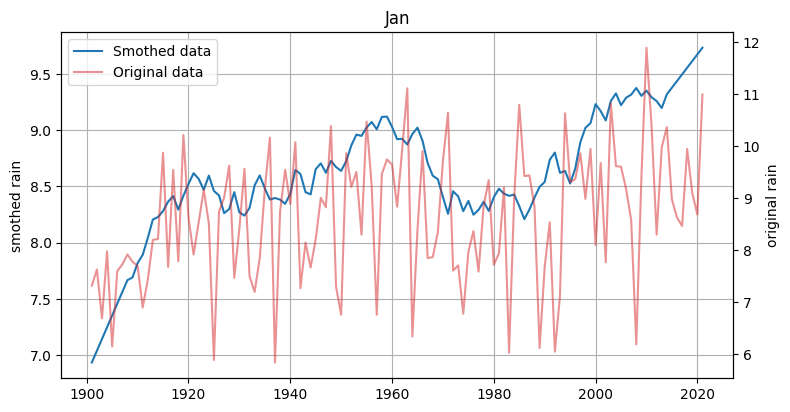

Feb
     year      value
0    1901  10.156750
1    1902  10.098643
2    1903  10.040536
3    1904   9.982429
4    1905   9.924321
..    ...        ...
116  2017  11.664893
117  2018  11.703857
118  2019  11.742821
119  2020  11.781786
120  2021  11.820750

[121 rows x 2 columns]
dalta value= 1.6640000000000015


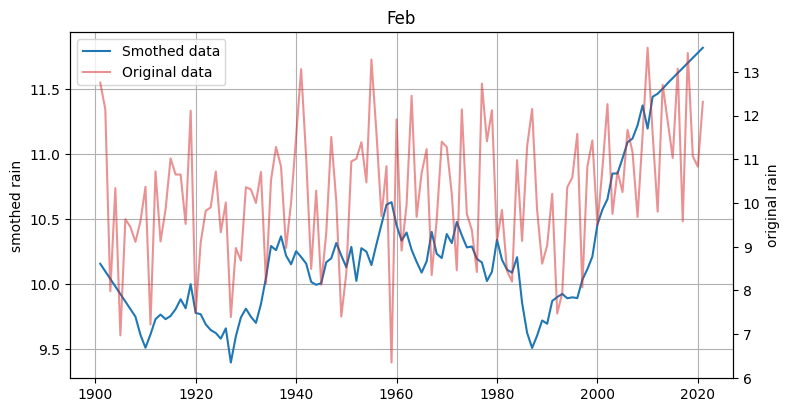

Mar
     year      value
0    1901  12.121750
1    1902  12.138643
2    1903  12.155536
3    1904  12.172429
4    1905  12.189321
..    ...        ...
116  2017  14.921369
117  2018  14.918048
118  2019  14.914726
119  2020  14.911405
120  2021  14.908083

[121 rows x 2 columns]
dalta value= 2.7863333333333333


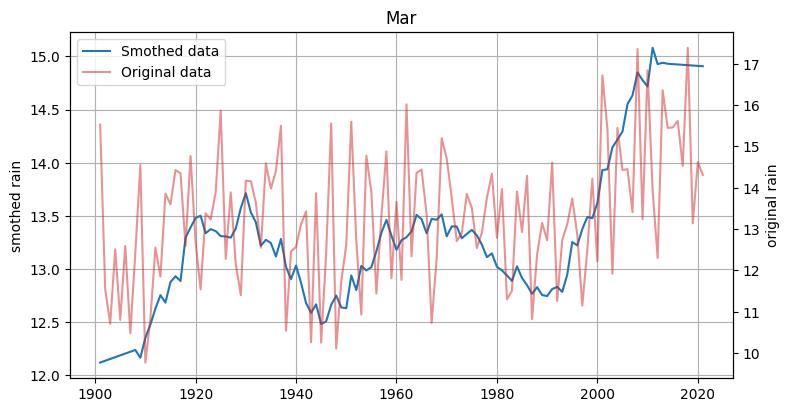

Apr
     year      value
0    1901  16.974583
1    1902  16.935548
2    1903  16.896512
3    1904  16.857476
4    1905  16.818440
..    ...        ...
116  2017  19.226464
117  2018  19.229286
118  2019  19.232107
119  2020  19.234929
120  2021  19.237750

[121 rows x 2 columns]
dalta value= 2.2631666666666703


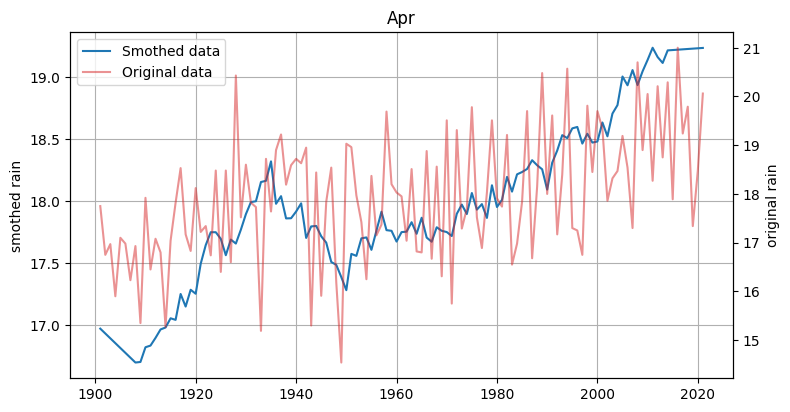

May
     year      value
0    1901  20.768417
1    1902  20.827310
2    1903  20.886202
3    1904  20.945095
4    1905  21.003988
..    ...        ...
116  2017  23.969631
117  2018  24.071952
118  2019  24.174274
119  2020  24.276595
120  2021  24.378917

[121 rows x 2 columns]
dalta value= 3.6105000000000054


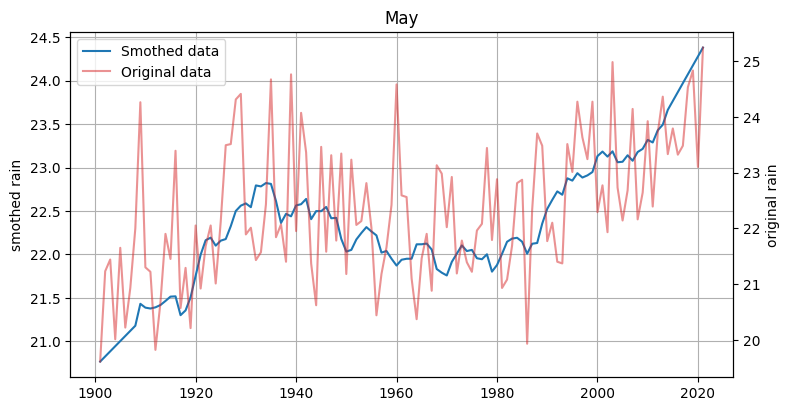

Jun
     year      value
0    1901  23.318917
1    1902  23.415167
2    1903  23.511417
3    1904  23.607667
4    1905  23.703917
..    ...        ...
116  2017  26.391250
117  2018  26.351000
118  2019  26.310750
119  2020  26.270500
120  2021  26.230250

[121 rows x 2 columns]
dalta value= 2.9113333333333387


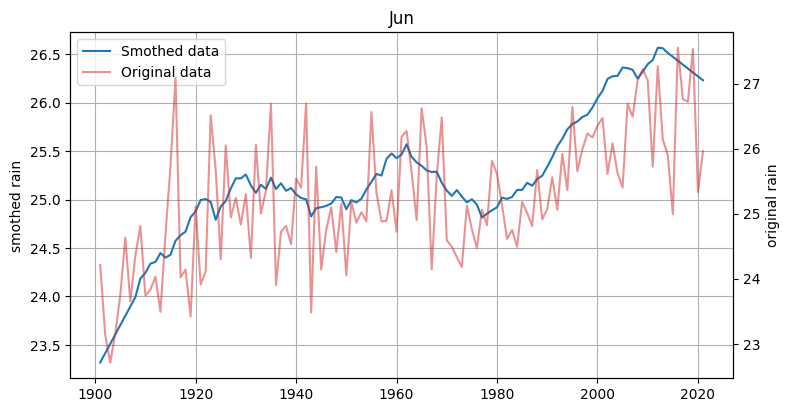

Jul
     year      value
0    1901  25.650167
1    1902  25.723952
2    1903  25.797738
3    1904  25.871524
4    1905  25.945310
..    ...        ...
116  2017  28.831583
117  2018  28.858333
118  2019  28.885083
119  2020  28.911833
120  2021  28.938583

[121 rows x 2 columns]
dalta value= 3.2884166666666665


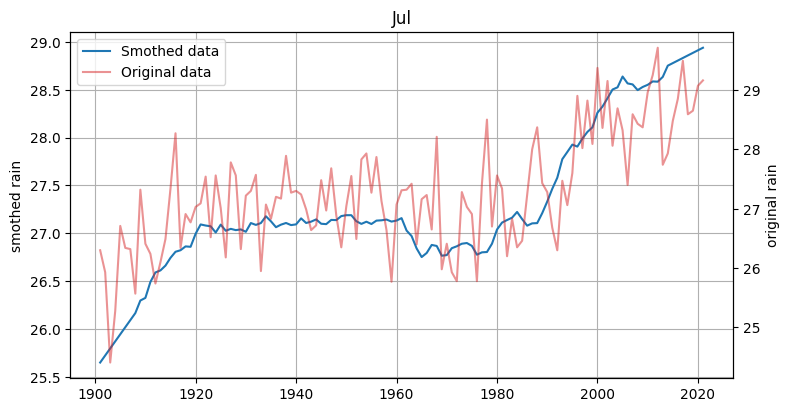

Aug
     year      value
0    1901  25.826833
1    1902  25.910333
2    1903  25.993833
3    1904  26.077333
4    1905  26.160833
..    ...        ...
116  2017  28.852738
117  2018  28.866095
118  2019  28.879452
119  2020  28.892810
120  2021  28.906167

[121 rows x 2 columns]
dalta value= 3.079333333333331


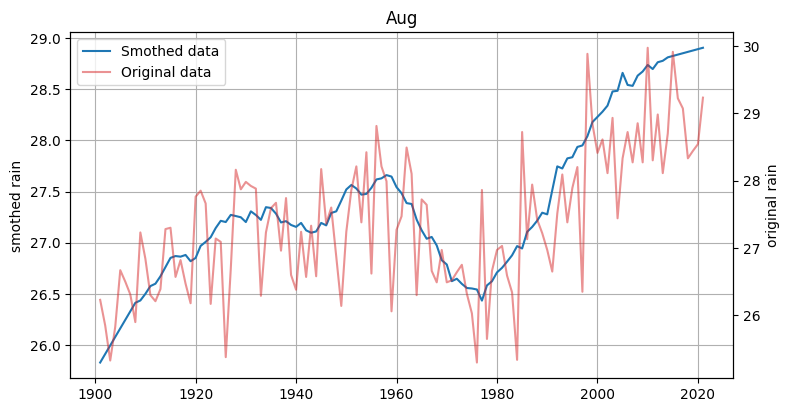

Sep
     year      value
0    1901  23.761250
1    1902  23.823071
2    1903  23.884893
3    1904  23.946714
4    1905  24.008536
..    ...        ...
116  2017  26.691786
117  2018  26.737714
118  2019  26.783643
119  2020  26.829571
120  2021  26.875500

[121 rows x 2 columns]
dalta value= 3.114250000000009


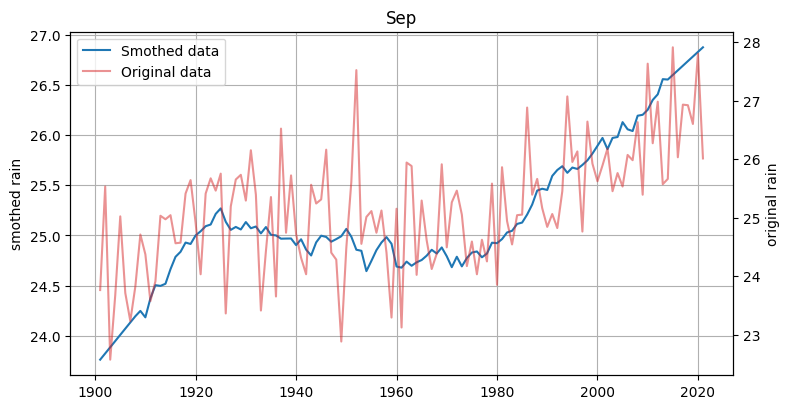

Oct
     year      value
0    1901  20.213667
1    1902  20.233238
2    1903  20.252810
3    1904  20.272381
4    1905  20.291952
..    ...        ...
116  2017  22.236262
117  2018  22.259905
118  2019  22.283548
119  2020  22.307190
120  2021  22.330833

[121 rows x 2 columns]
dalta value= 2.117166666666659


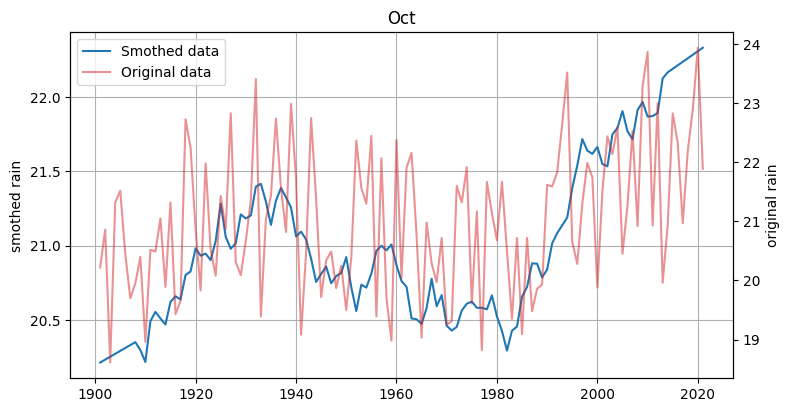

Nov
     year      value
0    1901  13.725417
1    1902  13.794452
2    1903  13.863488
3    1904  13.932524
4    1905  14.001560
..    ...        ...
116  2017  16.195464
117  2018  16.249286
118  2019  16.303107
119  2020  16.356929
120  2021  16.410750

[121 rows x 2 columns]
dalta value= 2.685333333333343


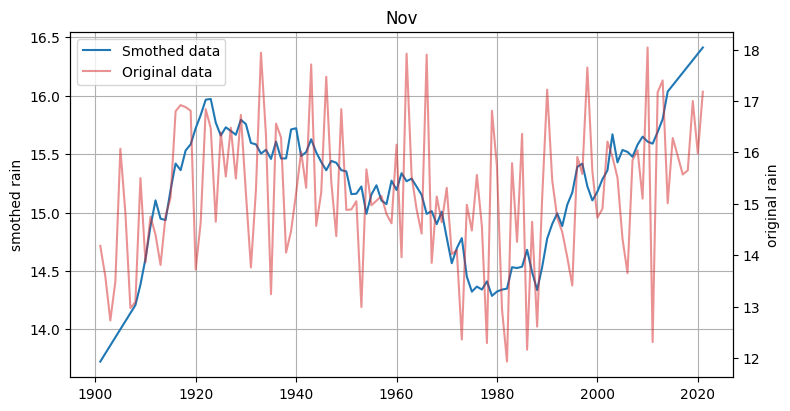

Dec
     year      value
0    1901   9.361167
1    1902   9.405952
2    1903   9.450738
3    1904   9.495524
4    1905   9.540310
..    ...        ...
116  2017  11.432548
117  2018  11.441619
118  2019  11.450690
119  2020  11.459762
120  2021  11.468833

[121 rows x 2 columns]
dalta value= 2.1076666666666686


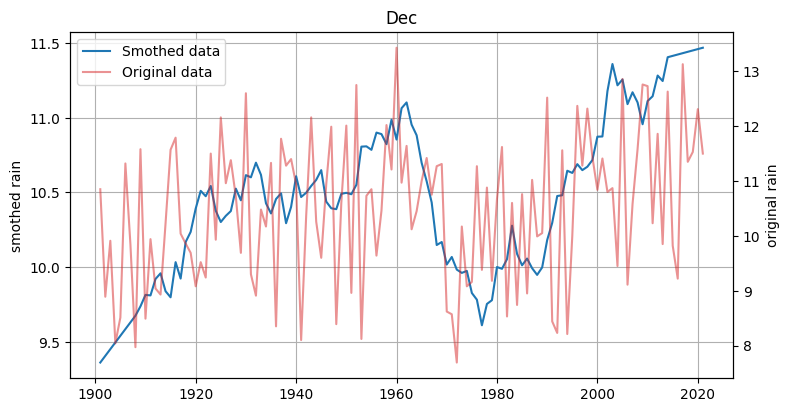

In [285]:
monthss=df.columns[1:]
for wanted_month in monthss:    
    data_smother(df,wanted_month)

    

## the temps for all months in one chart

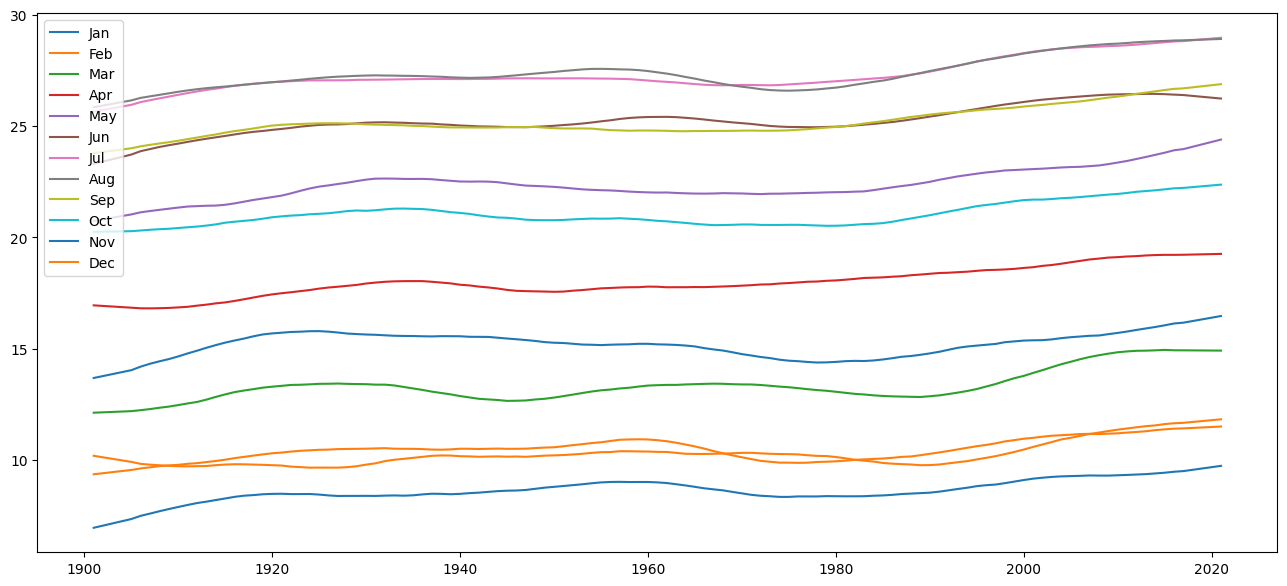

In [286]:
plt.figure(figsize=(16,7))
for wanted_month in monthss:    
    new_data=savgol_filter(df[wanted_month],10,1)
    newdf=pd.DataFrame({'year':df['Year'],'temp':new_data})
    plt.plot(newdf['year'],newdf['temp'],label=wanted_month)
plt.legend(loc='upper left')
plt.show()

## visualizing the temperature for each governates before and after smoothing

Jordan
     year      value
0    1901  17.433500
1    1902  17.478714
2    1903  17.523929
3    1904  17.569143
4    1905  17.614357
..    ...        ...
116  2017  20.030774
117  2018  20.058810
118  2019  20.086845
119  2020  20.114881
120  2021  20.142917

[121 rows x 2 columns]
dalta value= 2.709416666666666


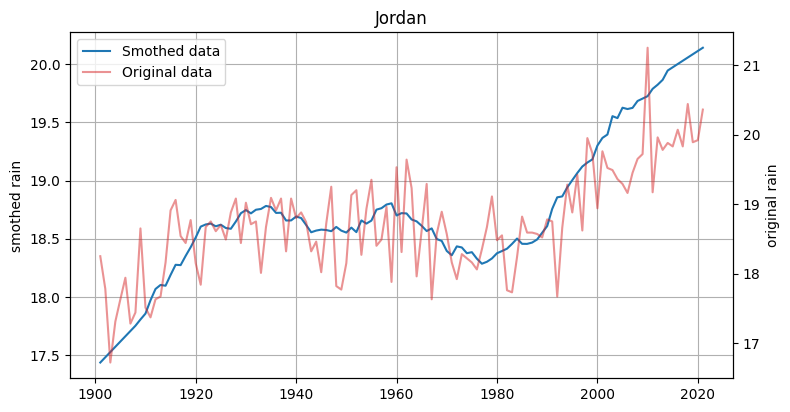

Ajloon
     year      value
0    1901  17.342417
1    1902  17.387024
2    1903  17.431631
3    1904  17.476238
4    1905  17.520845
..    ...        ...
116  2017  19.962988
117  2018  19.987095
118  2019  20.011202
119  2020  20.035310
120  2021  20.059417

[121 rows x 2 columns]
dalta value= 2.717000000000006


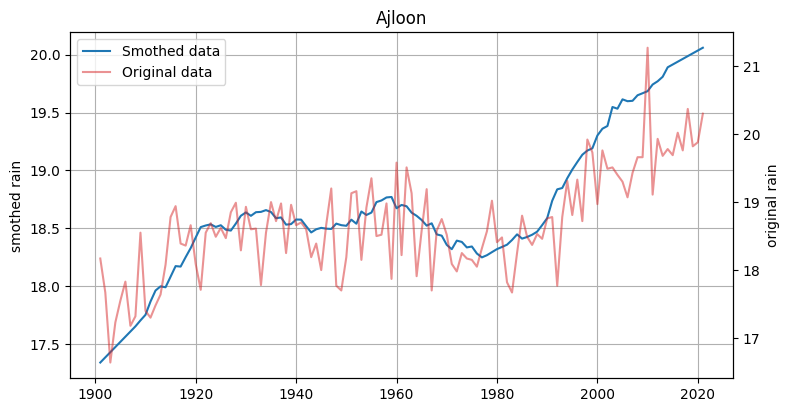

Balqa
     year      value
0    1901  17.321167
1    1902  17.366524
2    1903  17.411881
3    1904  17.457238
4    1905  17.502595
..    ...        ...
116  2017  19.935310
117  2018  19.959524
118  2019  19.983738
119  2020  20.007952
120  2021  20.032167

[121 rows x 2 columns]
dalta value= 2.711000000000002


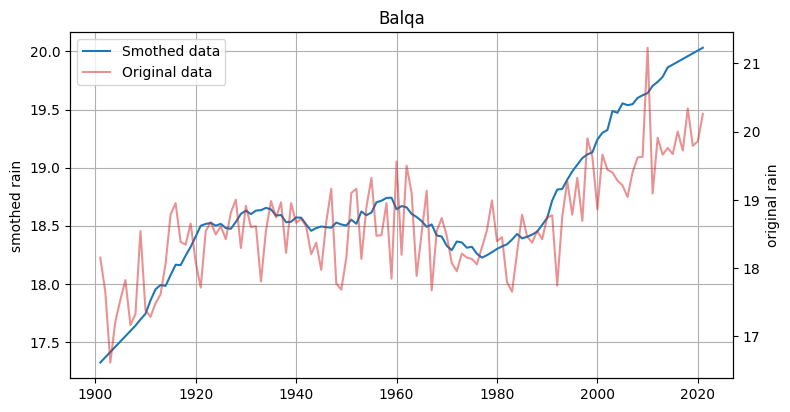

Aqaba
     year      value
0    1901  18.203917
1    1902  18.256595
2    1903  18.309274
3    1904  18.361952
4    1905  18.414631
..    ...        ...
116  2017  20.755988
117  2018  20.793095
118  2019  20.830202
119  2020  20.867310
120  2021  20.904417

[121 rows x 2 columns]
dalta value= 2.7005000000000017


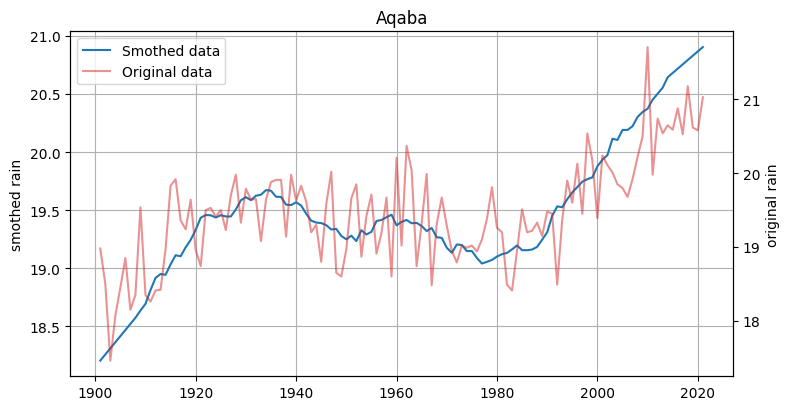

Karak
     year      value
0    1901  16.681167
1    1902  16.728524
2    1903  16.775881
3    1904  16.823238
4    1905  16.870595
..    ...        ...
116  2017  19.278095
117  2018  19.303238
118  2019  19.328381
119  2020  19.353524
120  2021  19.378667

[121 rows x 2 columns]
dalta value= 2.697499999999998


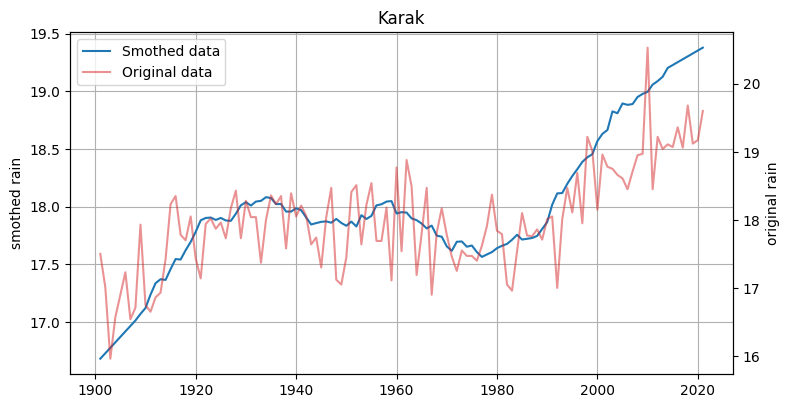

Amman
     year      value
0    1901  16.847167
1    1902  16.893952
2    1903  16.940738
3    1904  16.987524
4    1905  17.034310
..    ...        ...
116  2017  19.473143
117  2018  19.498857
118  2019  19.524571
119  2020  19.550286
120  2021  19.576000

[121 rows x 2 columns]
dalta value= 2.7288333333333377


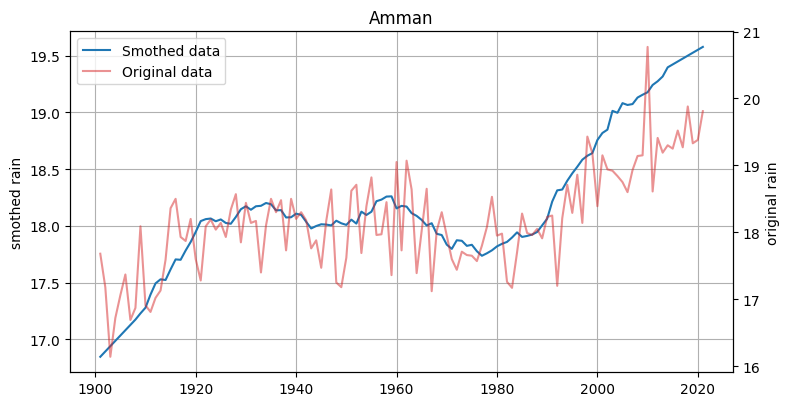

Tafiela
     year      value
0    1901  16.512750
1    1902  16.561214
2    1903  16.609679
3    1904  16.658143
4    1905  16.706607
..    ...        ...
116  2017  19.101143
117  2018  19.128857
118  2019  19.156571
119  2020  19.184286
120  2021  19.212000

[121 rows x 2 columns]
dalta value= 2.6992499999999993


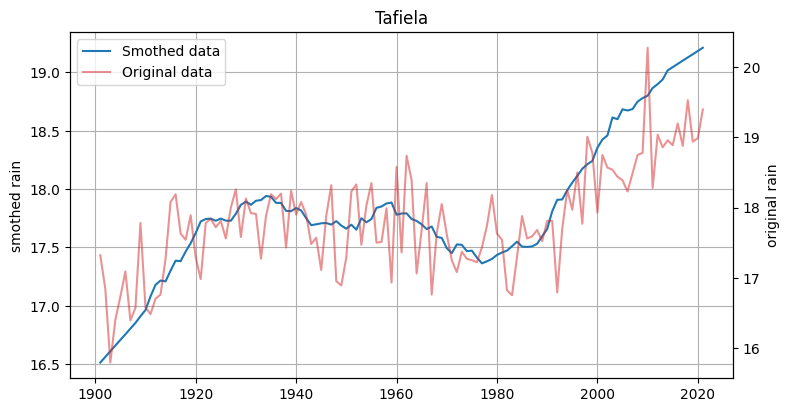

Irbid
     year      value
0    1901  17.714083
1    1902  17.756262
2    1903  17.798440
3    1904  17.840619
4    1905  17.882798
..    ...        ...
116  2017  20.348869
117  2018  20.374048
118  2019  20.399226
119  2020  20.424405
120  2021  20.449583

[121 rows x 2 columns]
dalta value= 2.7354999999999983


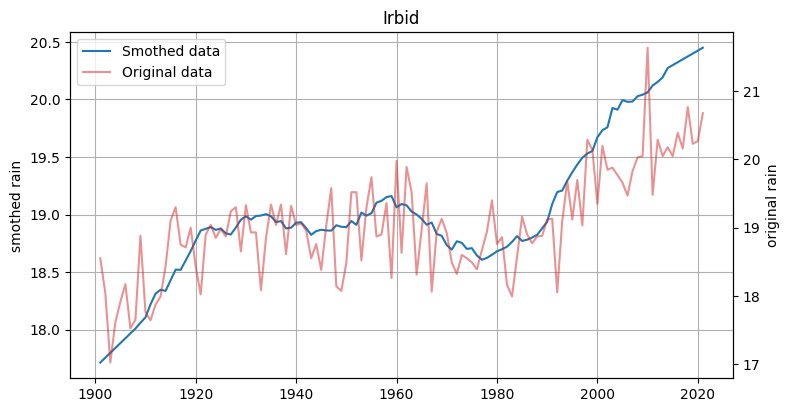

Jarash
     year      value
0    1901  17.342417
1    1902  17.387024
2    1903  17.431631
3    1904  17.476238
4    1905  17.520845
..    ...        ...
116  2017  19.962988
117  2018  19.987095
118  2019  20.011202
119  2020  20.035310
120  2021  20.059417

[121 rows x 2 columns]
dalta value= 2.717000000000006


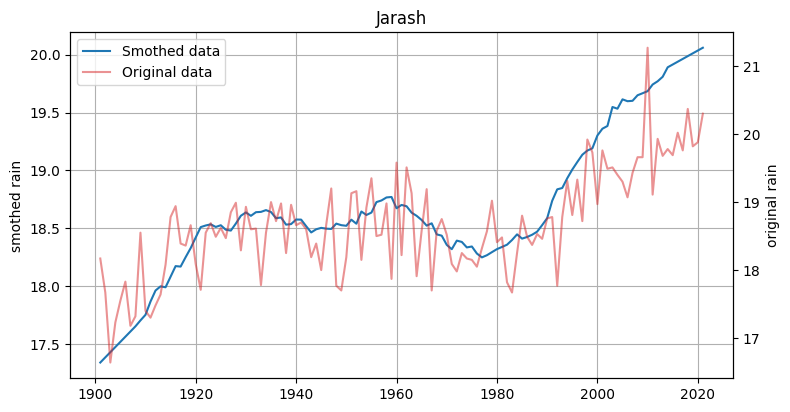

Ma'an
     year      value
0    1901  17.740833
1    1902  17.791476
2    1903  17.842119
3    1904  17.892762
4    1905  17.943405
..    ...        ...
116  2017  20.336548
117  2018  20.365619
118  2019  20.394690
119  2020  20.423762
120  2021  20.452833

[121 rows x 2 columns]
dalta value= 2.712000000000007


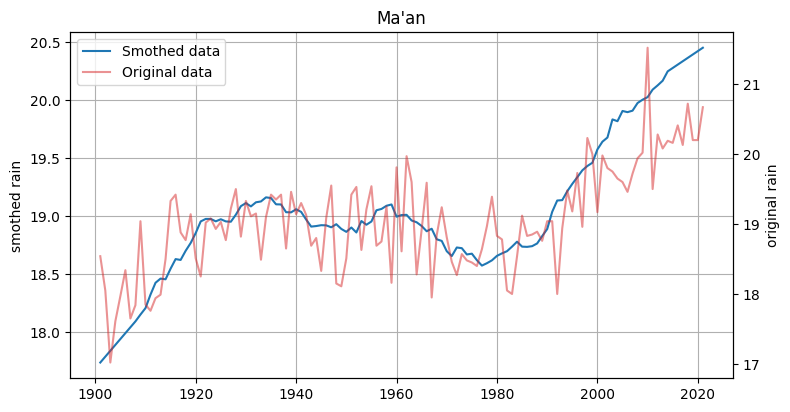

Madaba
     year      value
0    1901  17.225000
1    1902  17.271714
2    1903  17.318429
3    1904  17.365143
4    1905  17.411857
..    ...        ...
116  2017  19.828274
117  2018  19.852810
118  2019  19.877345
119  2020  19.901881
120  2021  19.926417

[121 rows x 2 columns]
dalta value= 2.7014166666666632


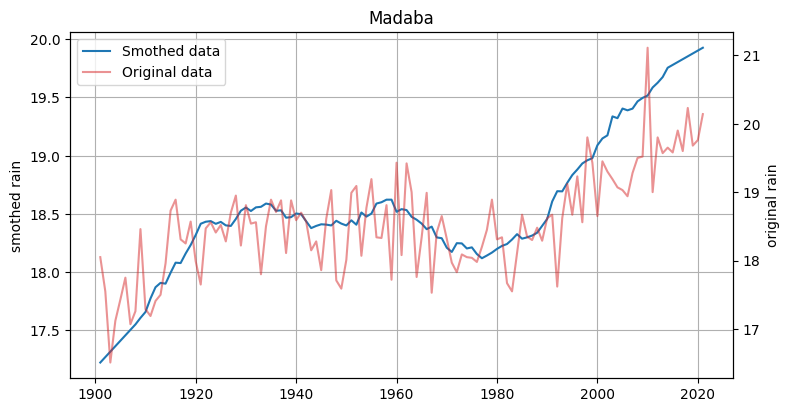

Mafraq
     year      value
0    1901  17.173583
1    1902  17.209548
2    1903  17.245512
3    1904  17.281476
4    1905  17.317440
..    ...        ...
116  2017  19.761917
117  2018  19.787667
118  2019  19.813417
119  2020  19.839167
120  2021  19.864917

[121 rows x 2 columns]
dalta value= 2.6913333333333362


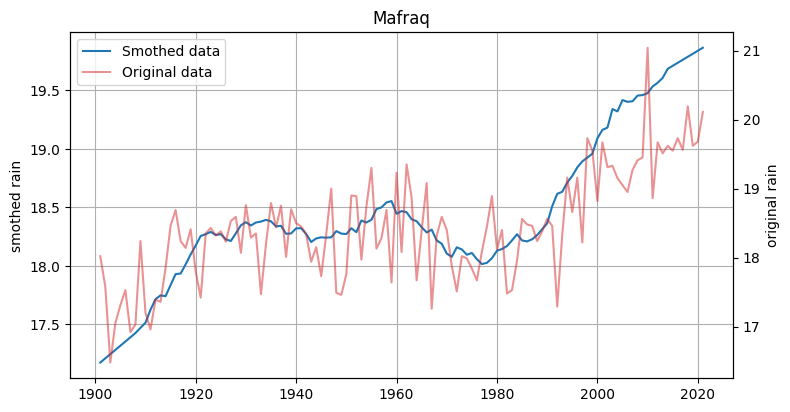

Zarqa
     year      value
0    1901  17.617917
1    1902  17.661738
2    1903  17.705560
3    1904  17.749381
4    1905  17.793202
..    ...        ...
116  2017  20.255869
117  2018  20.282048
118  2019  20.308226
119  2020  20.334405
120  2021  20.360583

[121 rows x 2 columns]
dalta value= 2.742666666666665


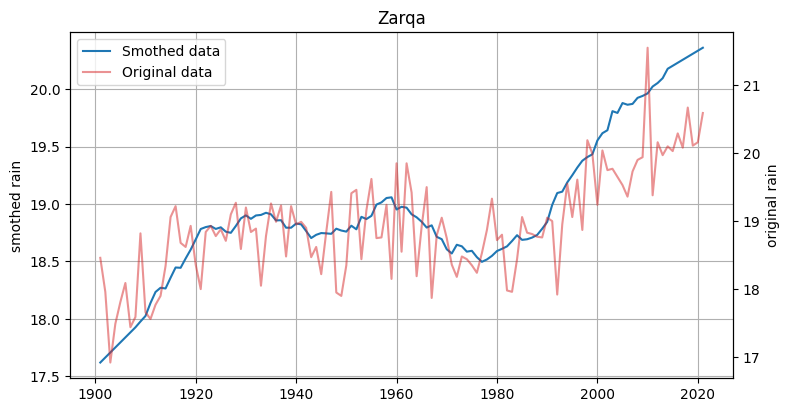

In [287]:
governates=jor_temp_df.columns[1:]
for wanted_governates in governates:
    data_smother(jor_temp_df,wanted_governates)

    

## co2 annual change percentage

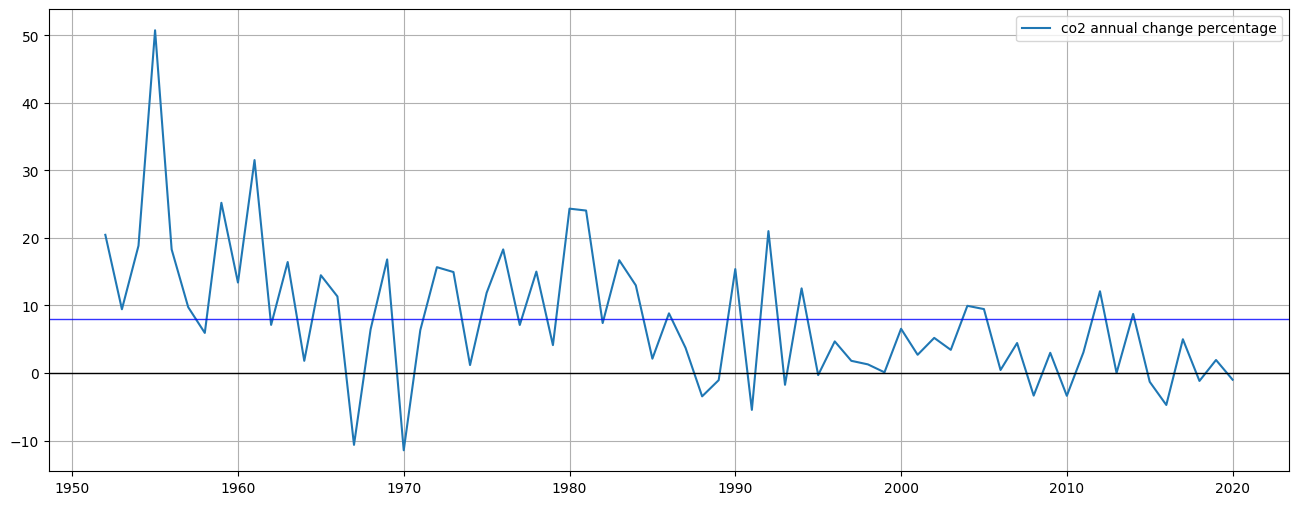

In [288]:
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(6)

ax.plot(co2_df['Year'],co2_df['co2_prc']*100,label='co2 annual change percentage')

ax.axhline(y=0, lw=1, color='k',alpha=1)
ax.axhline(y=co2_df['co2_prc'].mean()*100, lw=1, color='blue',alpha=.8)
plt.legend()


plt.grid()
plt.show()

## CO2 Cumulative Emissions and temperature for each month

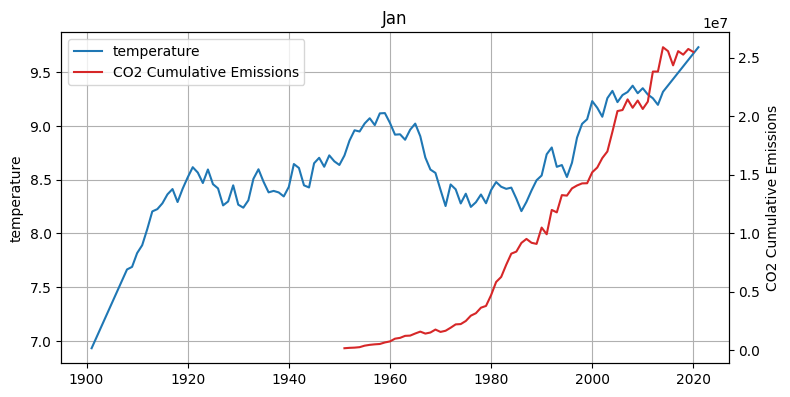

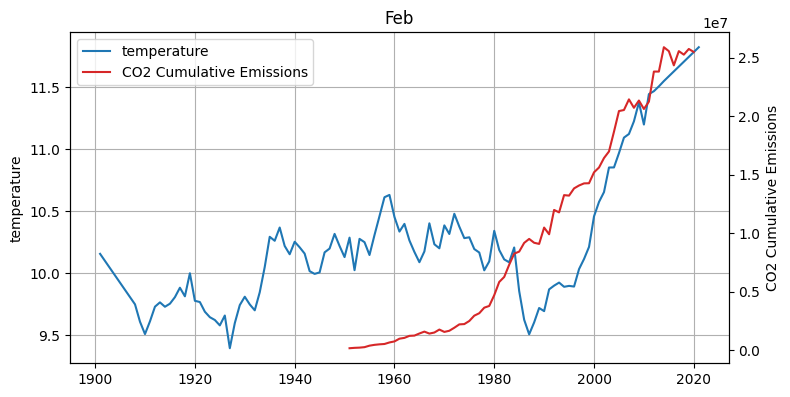

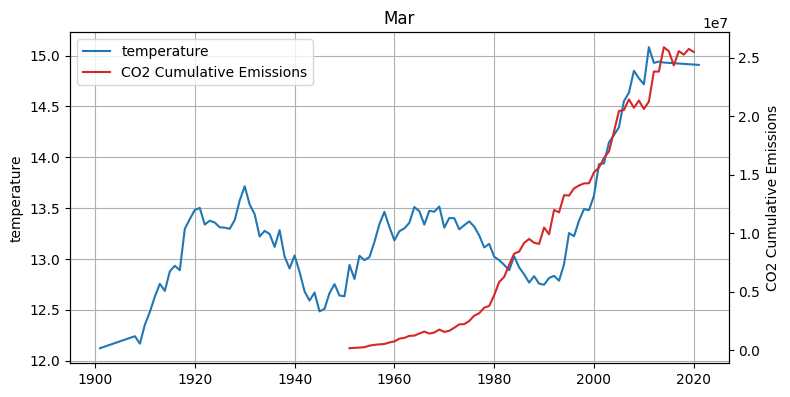

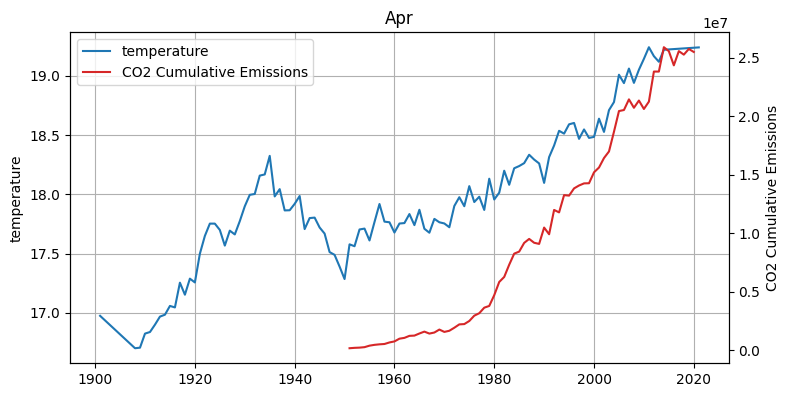

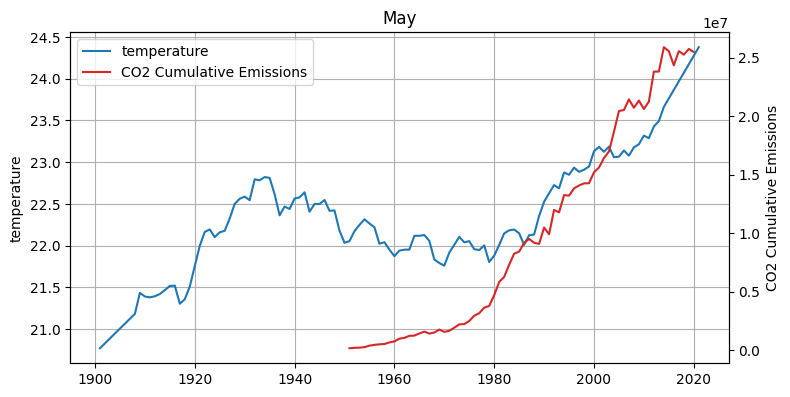

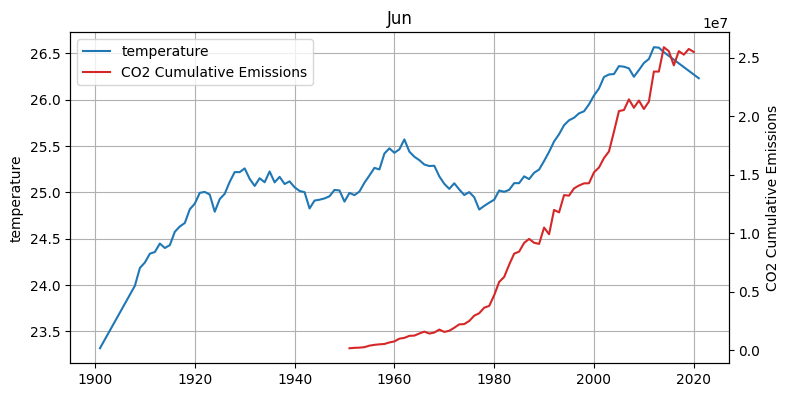

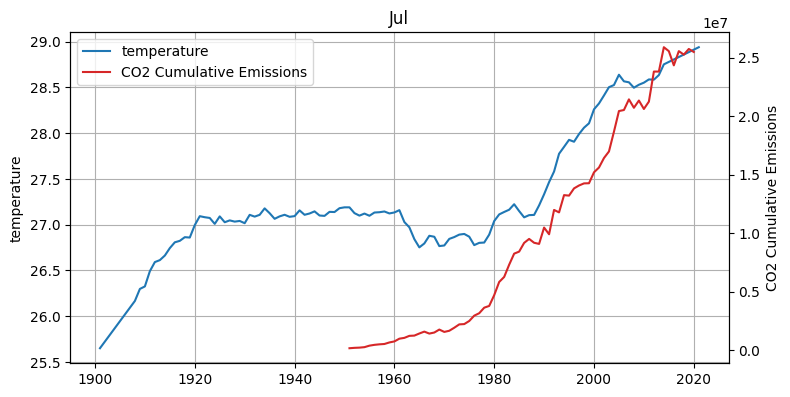

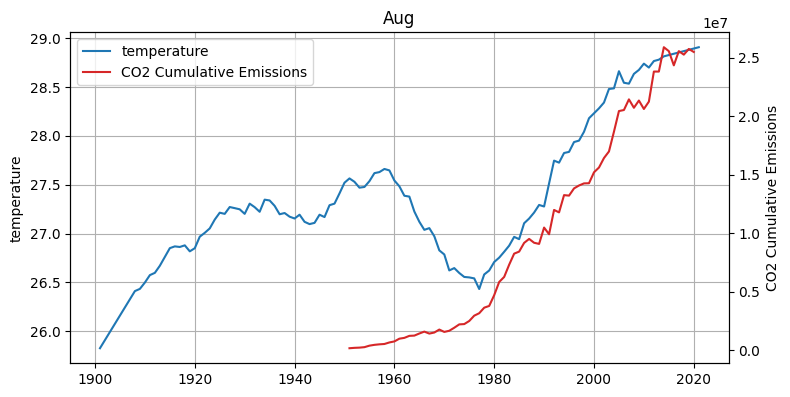

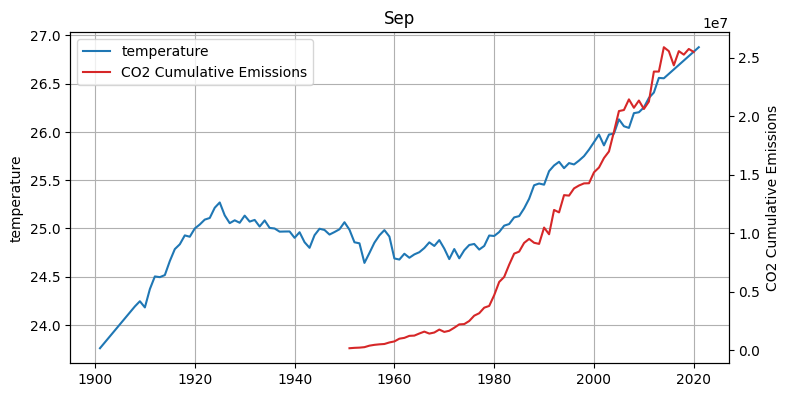

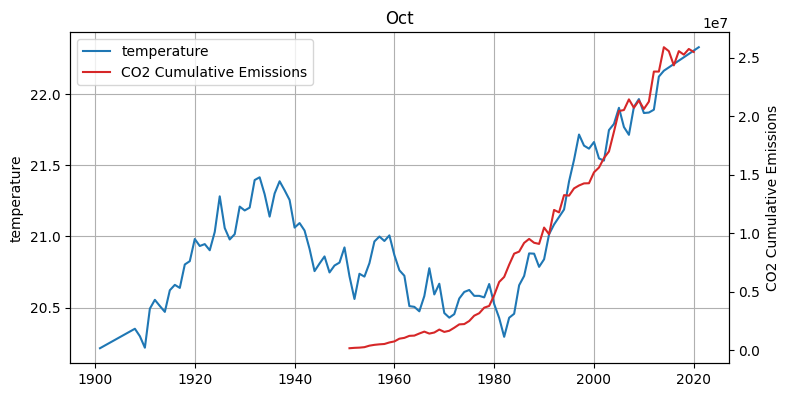

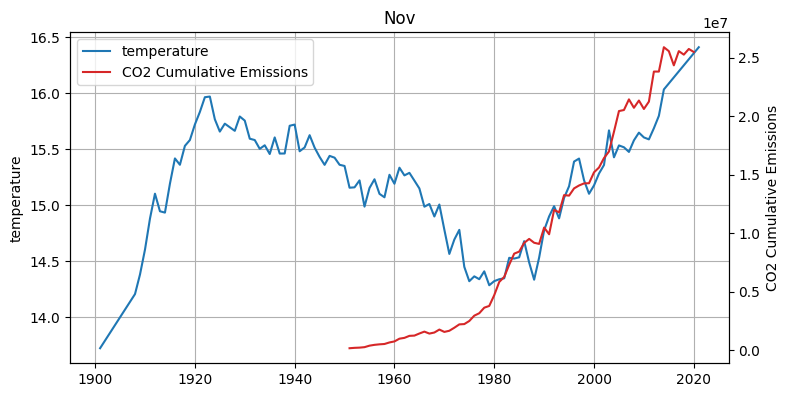

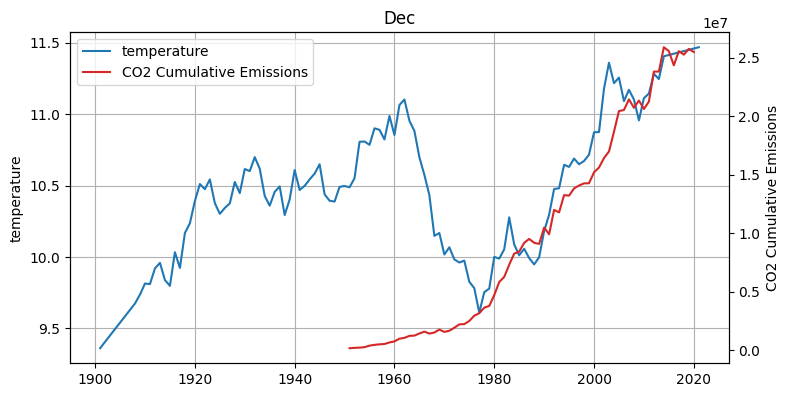

In [289]:
for wanted_month in monthss:    
    fig, ax1 = plt.subplots()
    fig.set_figwidth(8)
    fig.set_figheight(4)

    plot1=ax1.plot(df['Year'],df[wanted_month], color='tab:blue',label='temperature')
    ax1.set_ylabel('temperature')  
    plt.grid()

    ax2 = ax1.twinx()
    ax2.set_ylabel('CO2 Cumulative Emissions')  
    plot2=ax2.plot(co2_df['Year'],co2_df['co2_diff'], color='tab:red',label='CO2 Cumulative Emissions')

    fig.tight_layout()
    plt.title(wanted_month)
    lns = plot1+plot2
    labs = [l.get_label() for l in lns]
    
    ax1.legend(lns, labs, loc=0)

    plt.show()

## CO2 Cumulative Emissions and temperature for each governate

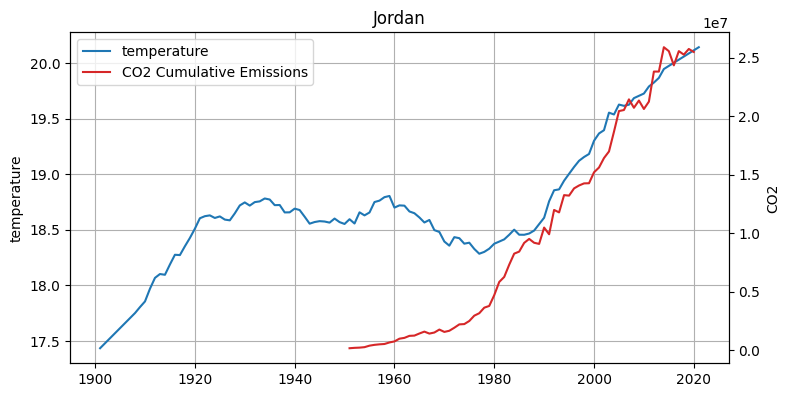

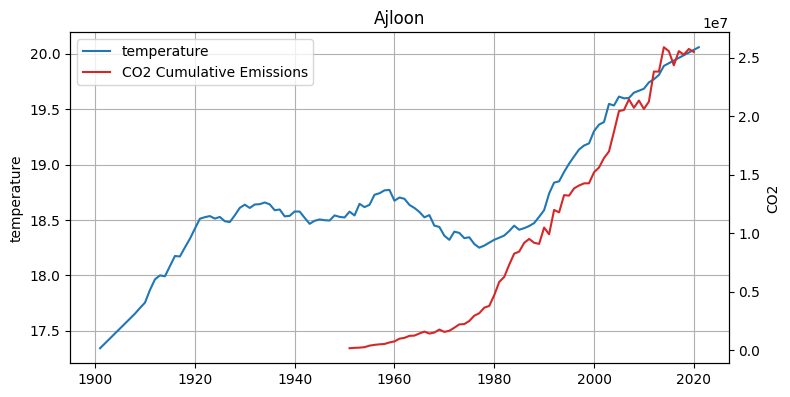

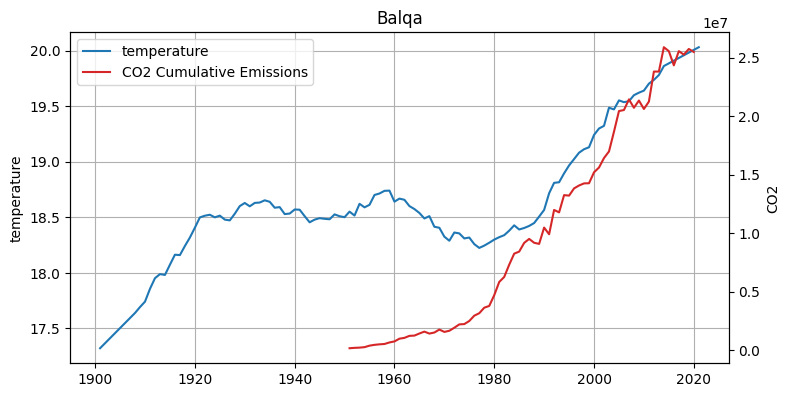

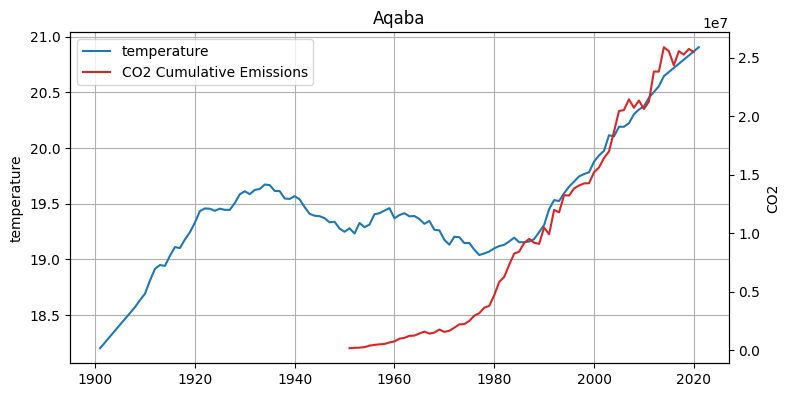

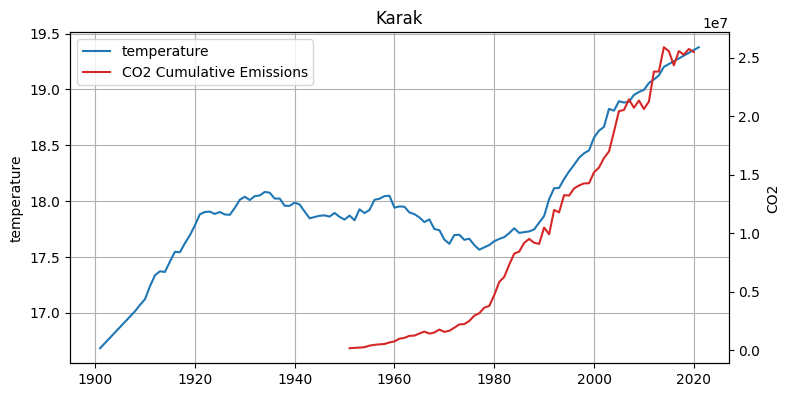

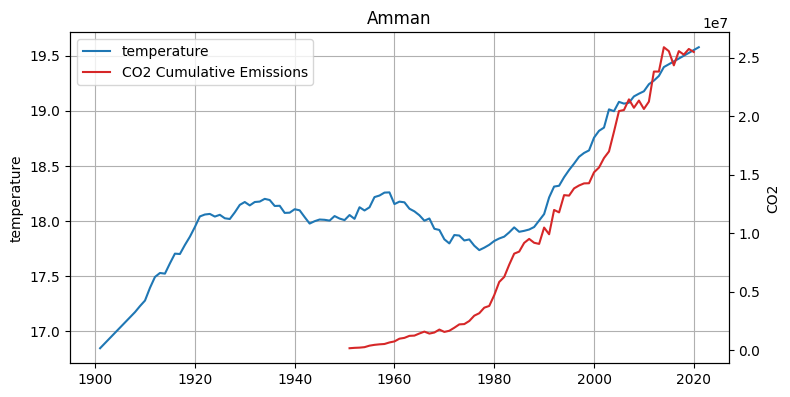

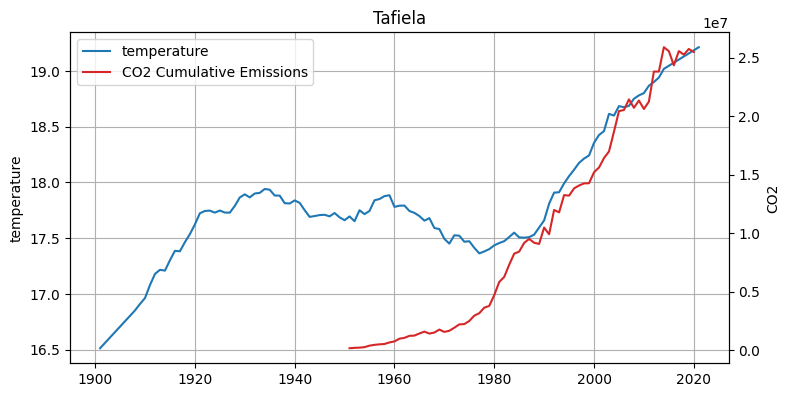

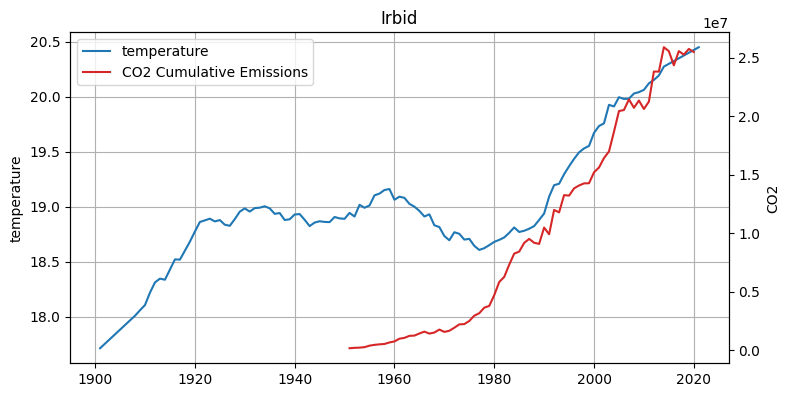

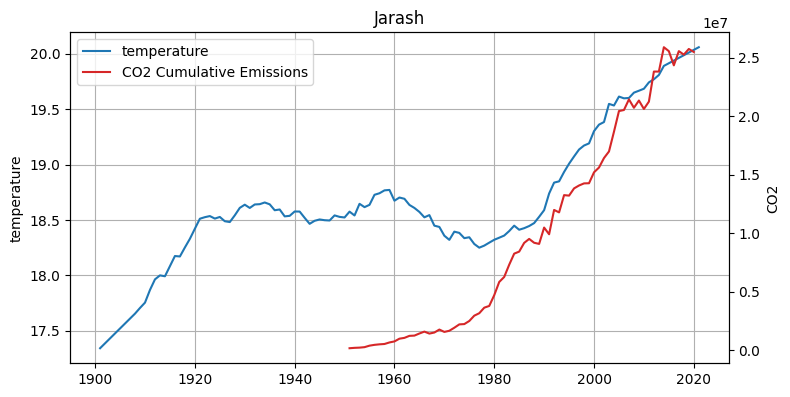

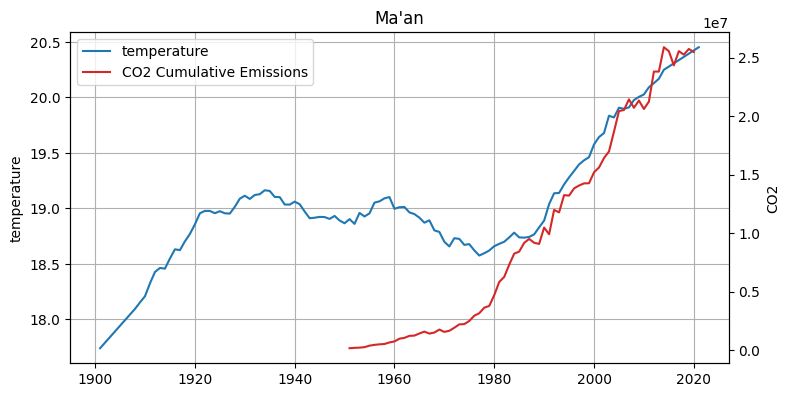

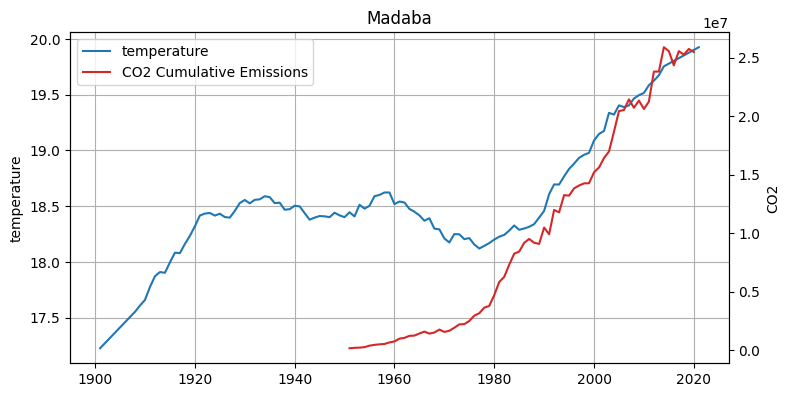

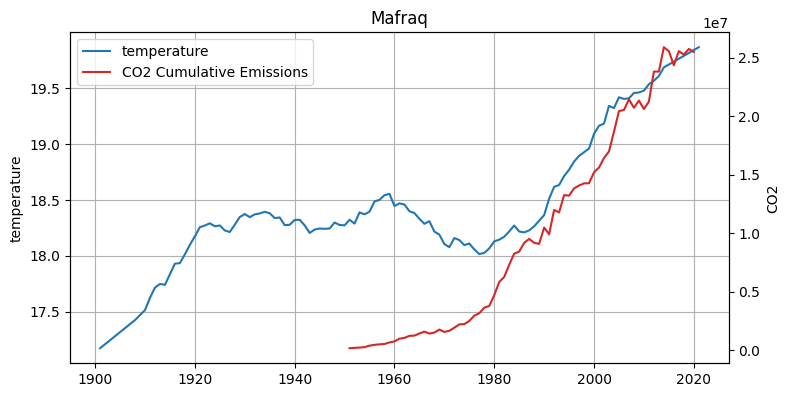

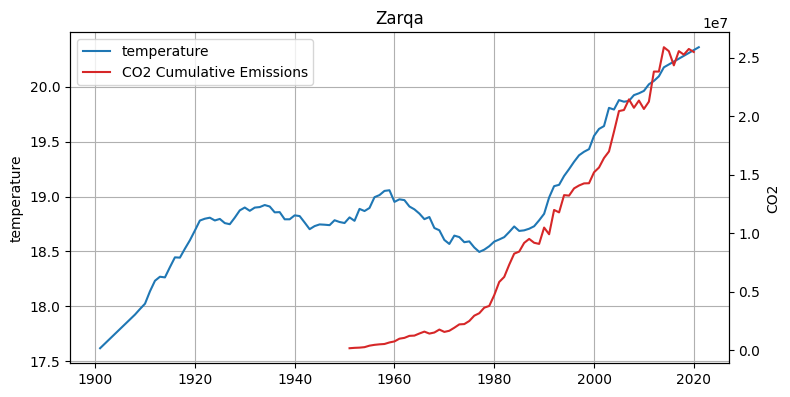

In [290]:
for wanted_governates in governates:    
    fig, ax1 = plt.subplots()
    fig.set_figwidth(8)
    fig.set_figheight(4)

    plot1=ax1.plot(jor_temp_df['Year'],jor_temp_df[wanted_governates], color='tab:blue',label='temperature')
    ax1.set_ylabel('temperature')  
    plt.grid()

    ax2 = ax1.twinx()
    ax2.set_ylabel('CO2')  
    plot2=ax2.plot(co2_df['Year'],co2_df['co2_diff'], color='tab:red',label='CO2 Cumulative Emissions')

    fig.tight_layout()
    plt.title(wanted_governates)
    lns = plot1+plot2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc=0)
    
    plt.show()

## CO2 Cumulative Emissions, temperature and Agricultural land 

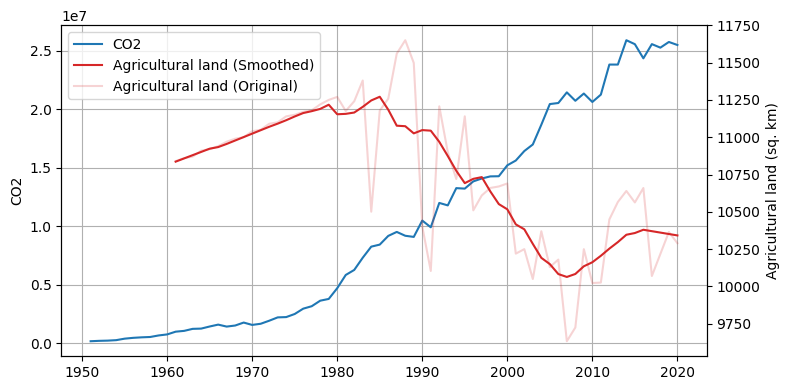

In [291]:
# jor_temp_df['Year']=pd.to_datetime(jor_temp_df['Year'])
new_values=savgol_filter(jor_temp_df['Jordan'],10,1)
fig, ax1 = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(4)
plot1=ax1.plot(co2_df['Year'],co2_df['co2_diff'], color='tab:blue',label='CO2')
ax1.set_ylabel('CO2')  
plt.grid()
ax2 = ax1.twinx()
ax2.set_ylabel('Agricultural land (sq. km)')  
plot2=ax2.plot(land_df['Year'],savgol_filter(land_df['Value'],10,1), color='tab:red',label="Agricultural land (Smoothed)")
plot3=ax2.plot(land_df['Year'],land_df['Value'], color='tab:red',alpha=0.2,label="Agricultural land (Original)")

lns = plot1+plot2+plot3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

fig.tight_layout()

plt.show()

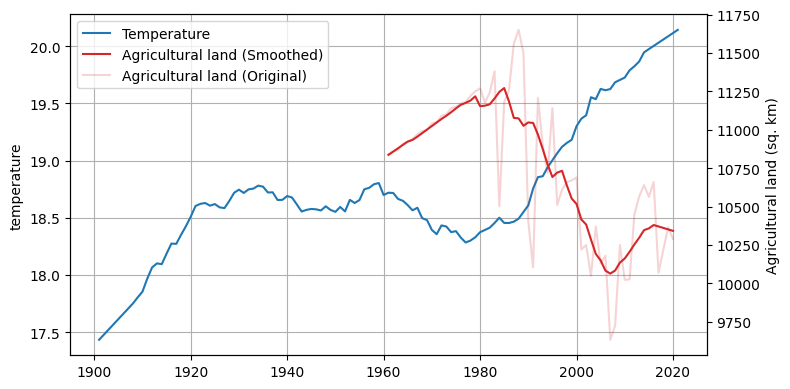

In [292]:
# jor_temp_df['Year']=pd.to_datetime(jor_temp_df['Year'])
new_values=savgol_filter(jor_temp_df['Jordan'],10,1)
fig, ax1 = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(4)
plot1=ax1.plot(jor_temp_df['Year'],jor_temp_df['Jordan'], color='tab:blue',label='Temperature')
ax1.set_ylabel('temperature')  
plt.grid()
ax2 = ax1.twinx()
ax2.set_ylabel('Agricultural land (sq. km)')  
plot2=ax2.plot(land_df['Year'],savgol_filter(land_df['Value'],10,1), color='tab:red',label="Agricultural land (Smoothed)")
plot3=ax2.plot(land_df['Year'],land_df['Value'], color='tab:red',alpha=0.2,label="Agricultural land (Original)")

lns = plot1+plot2+plot3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

fig.tight_layout()

plt.show()

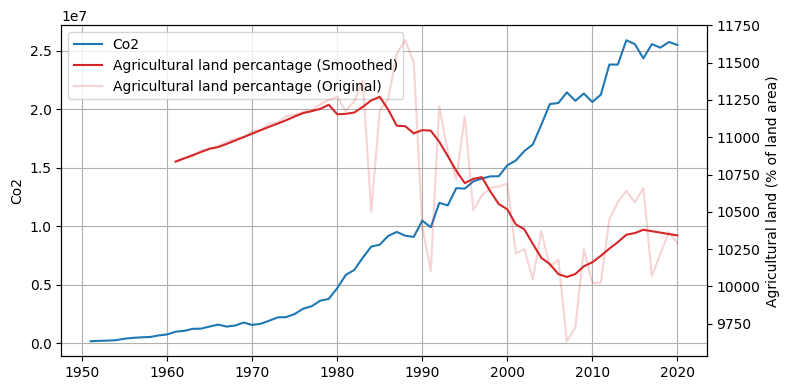

In [293]:
# jor_temp_df['Year']=pd.to_datetime(jor_temp_df['Year'])
new_values=savgol_filter(jor_temp_df['Jordan'],10,1)
fig, ax1 = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(4)
plot1=ax1.plot(co2_df['Year'],co2_df['co2_diff'], color='tab:blue',label='Co2')
ax1.set_ylabel('Co2')  
plt.grid()
ax2 = ax1.twinx()
ax2.set_ylabel('Agricultural land (% of land area)')  
plot2=ax2.plot(land_df['Year'],savgol_filter(land_df['Value'],10,1), color='tab:red',label="Agricultural land percantage (Smoothed)")
plot3=ax2.plot(land_df['Year'],land_df['Value'], color='tab:red',alpha=0.2,label="Agricultural land percantage (Original)")

lns = plot1+plot2+plot3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

fig.tight_layout()

plt.show()

## visualizing the rain value for each month before and after smoothing

Jan
     year      value
0    1901  35.233167
1    1902  34.429952
2    1903  33.626738
3    1904  32.823524
4    1905  32.020310
..    ...        ...
116  2017  22.588119
117  2018  22.531048
118  2019  22.473976
119  2020  22.416905
120  2021  22.359833

[121 rows x 2 columns]
dalta value= -12.873333333333324


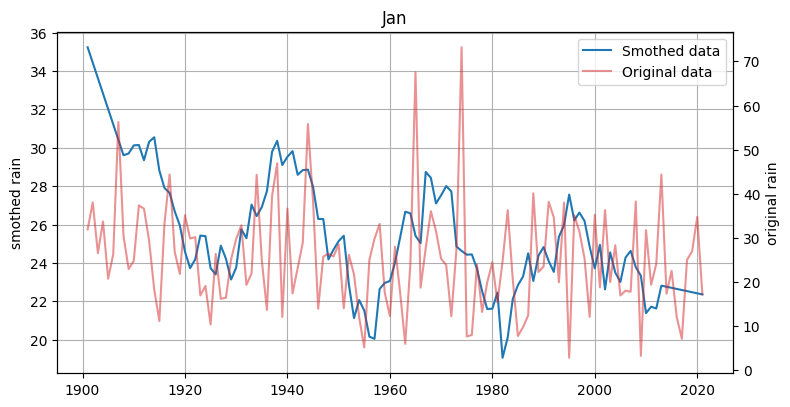

Feb
     year      value
0    1901  16.425000
1    1902  16.905714
2    1903  17.386429
3    1904  17.867143
4    1905  18.347857
..    ...        ...
116  2017  22.895964
117  2018  23.003286
118  2019  23.110607
119  2020  23.217929
120  2021  23.325250

[121 rows x 2 columns]
dalta value= 6.900249999999996


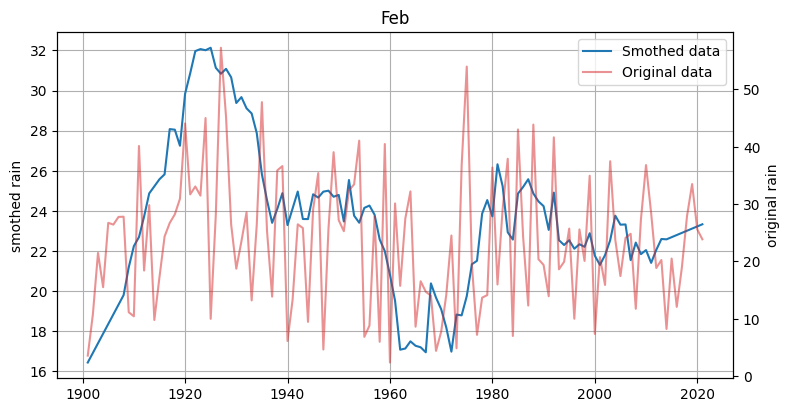

Mar
     year      value
0    1901  19.037000
1    1902  19.172286
2    1903  19.307571
3    1904  19.442857
4    1905  19.578143
..    ...        ...
116  2017  13.526298
117  2018  13.778619
118  2019  14.030940
119  2020  14.283262
120  2021  14.535583

[121 rows x 2 columns]
dalta value= -4.501416666666662


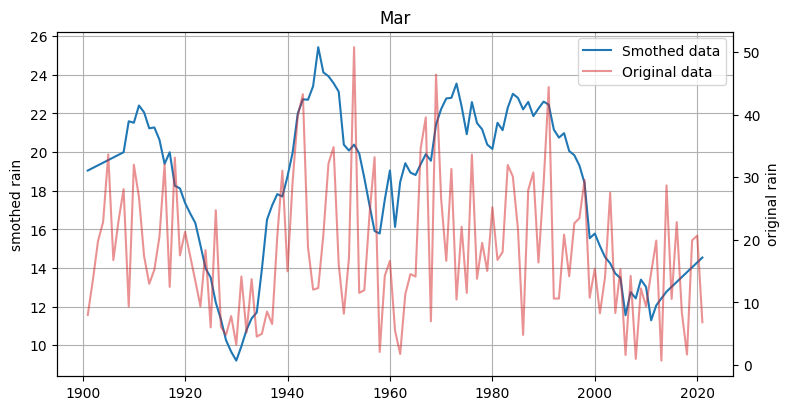

Apr
     year      value
0    1901  10.184667
1    1902  10.850952
2    1903  11.517238
3    1904  12.183524
4    1905  12.849810
..    ...        ...
116  2017   7.600119
117  2018   7.773048
118  2019   7.945976
119  2020   8.118905
120  2021   8.291833

[121 rows x 2 columns]
dalta value= -1.892833333333332


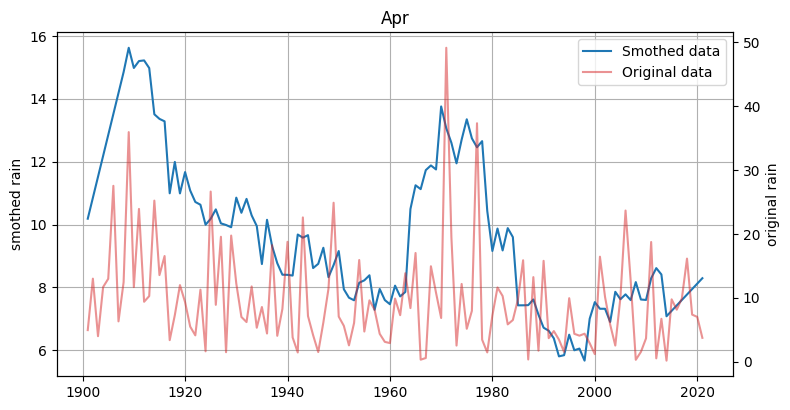

May
     year     value
0    1901  7.111500
1    1902  6.882714
2    1903  6.653929
3    1904  6.425143
4    1905  6.196357
..    ...       ...
116  2017  3.866512
117  2018  3.850905
118  2019  3.835298
119  2020  3.819690
120  2021  3.804083

[121 rows x 2 columns]
dalta value= -3.307416666666666


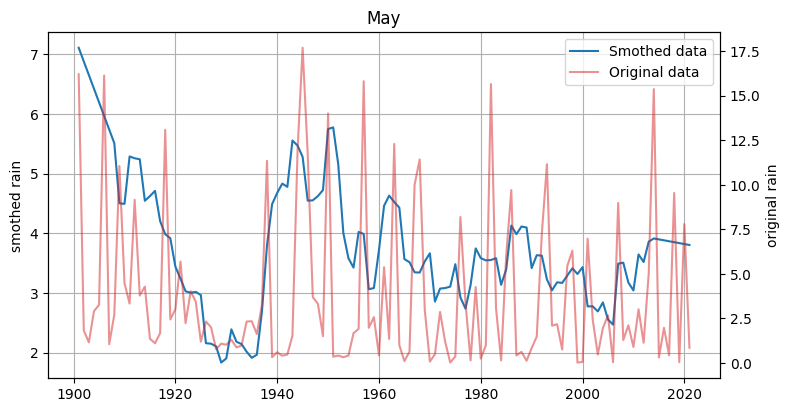

Jun
     year     value
0    1901  0.121167
1    1902  0.122524
2    1903  0.123881
3    1904  0.125238
4    1905  0.126595
..    ...       ...
116  2017  0.038810
117  2018  0.039524
118  2019  0.040238
119  2020  0.040952
120  2021  0.041667

[121 rows x 2 columns]
dalta value= -0.07949999999999996


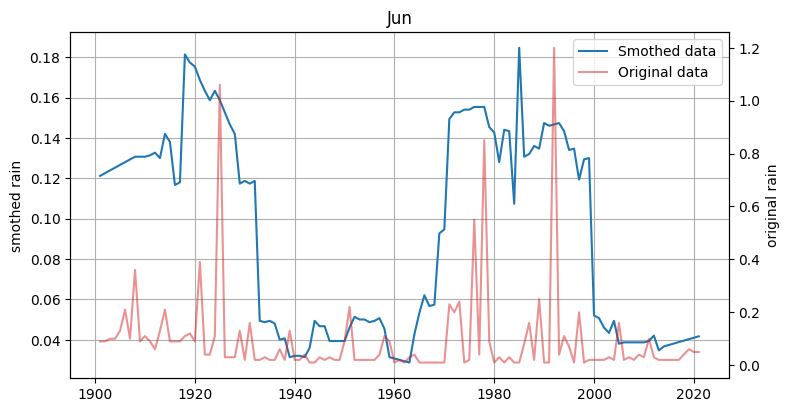

Jul
     year  value
0    1901   0.07
1    1902   0.07
2    1903   0.07
3    1904   0.07
4    1905   0.07
..    ...    ...
116  2017   0.07
117  2018   0.07
118  2019   0.07
119  2020   0.07
120  2021   0.07

[121 rows x 2 columns]
dalta value= 0.0


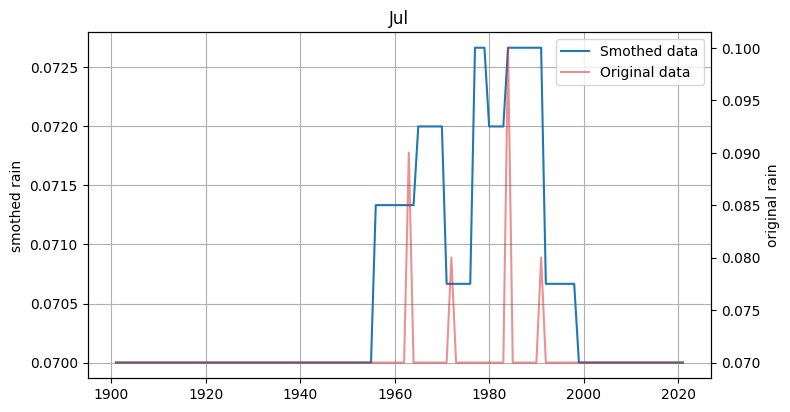

Aug
     year     value
0    1901  0.070000
1    1902  0.070000
2    1903  0.070000
3    1904  0.070000
4    1905  0.070000
..    ...       ...
116  2017  0.013929
117  2018  0.014571
118  2019  0.015214
119  2020  0.015857
120  2021  0.016500

[121 rows x 2 columns]
dalta value= -0.053500000000000006


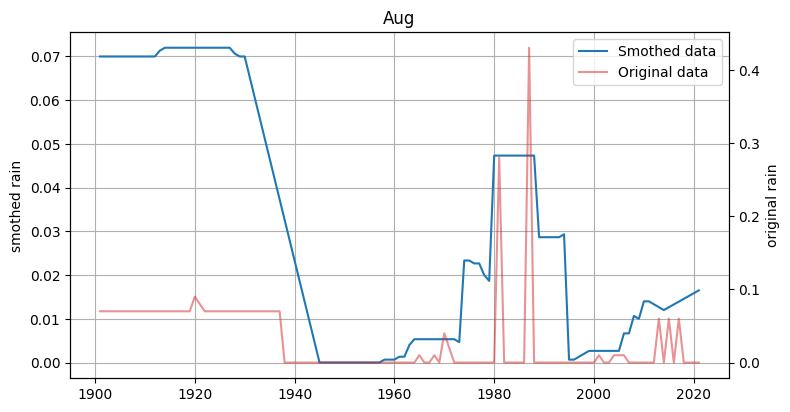

Sep
     year     value
0    1901  0.037167
1    1902  0.041095
2    1903  0.045024
3    1904  0.048952
4    1905  0.052881
..    ...       ...
116  2017  0.054476
117  2018  0.044190
118  2019  0.033905
119  2020  0.023619
120  2021  0.013333

[121 rows x 2 columns]
dalta value= -0.02383333333333334


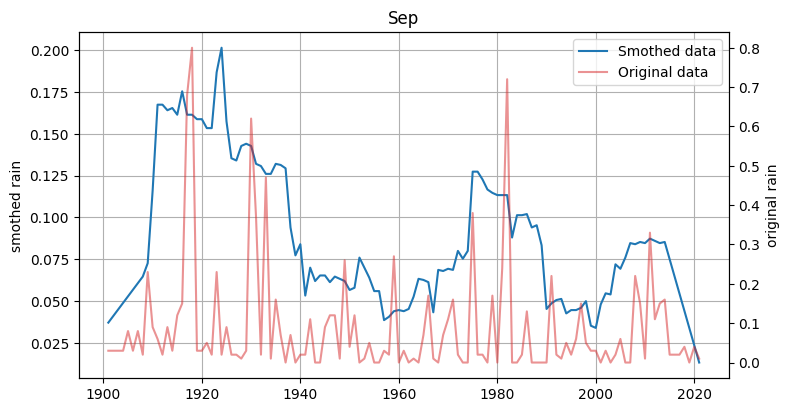

Oct
     year     value
0    1901  3.658667
1    1902  3.868095
2    1903  4.077524
3    1904  4.286952
4    1905  4.496381
..    ...       ...
116  2017  4.898881
117  2018  4.960952
118  2019  5.023024
119  2020  5.085095
120  2021  5.147167

[121 rows x 2 columns]
dalta value= 1.4885000000000037


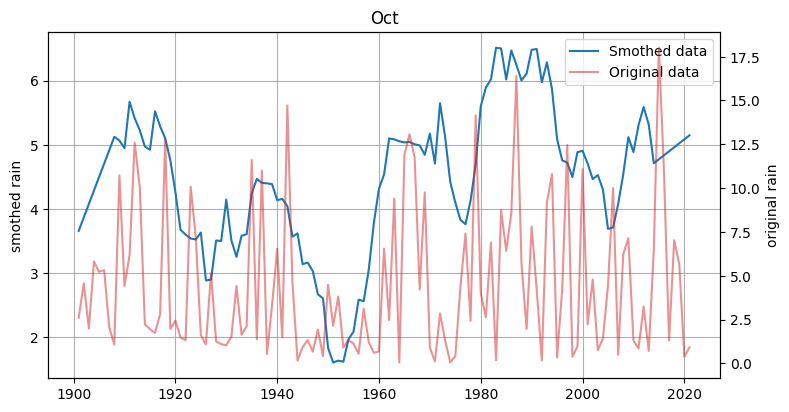

Nov
     year      value
0    1901  12.986083
1    1902  13.128548
2    1903  13.271012
3    1904  13.413476
4    1905  13.555940
..    ...        ...
116  2017  12.090405
117  2018  12.454762
118  2019  12.819119
119  2020  13.183476
120  2021  13.547833

[121 rows x 2 columns]
dalta value= 0.5617500000000089


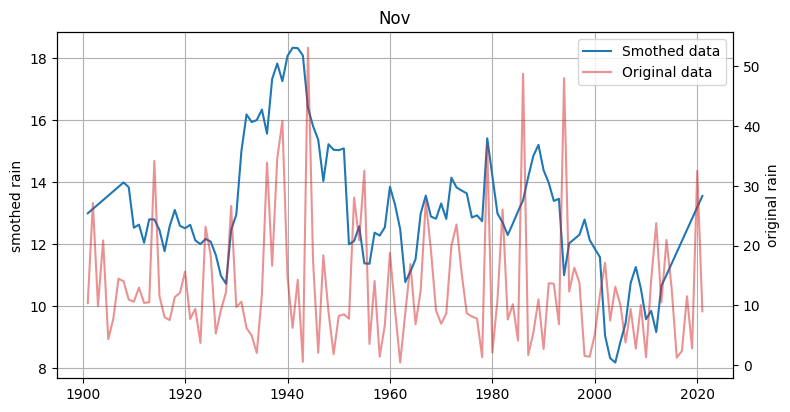

Dec
     year      value
0    1901  26.983333
1    1902  26.454762
2    1903  25.926190
3    1904  25.397619
4    1905  24.869048
..    ...        ...
116  2017  19.314155
117  2018  20.181762
118  2019  21.049369
119  2020  21.916976
120  2021  22.784583

[121 rows x 2 columns]
dalta value= -4.19874999999999


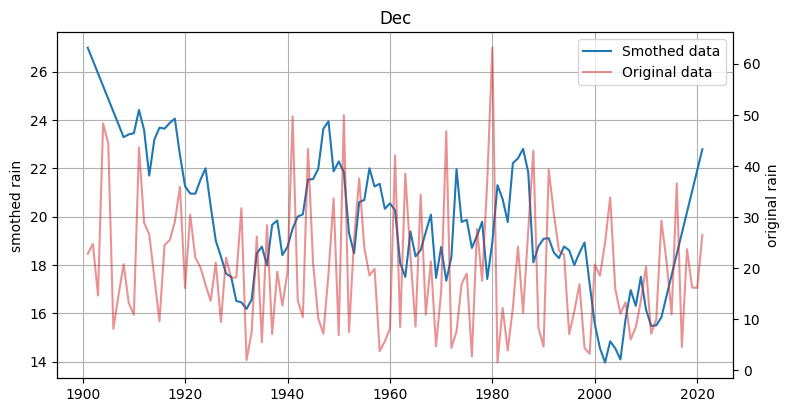

In [294]:
monthss=rain_df.columns[1:]
for wanted_month in monthss:    
    data_smother(rain_df,wanted_month)

    

## CO2 Cumulative Emissions and temperature for each month

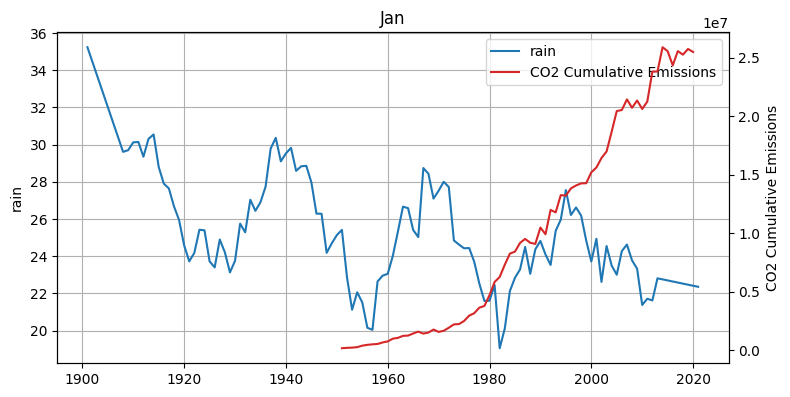

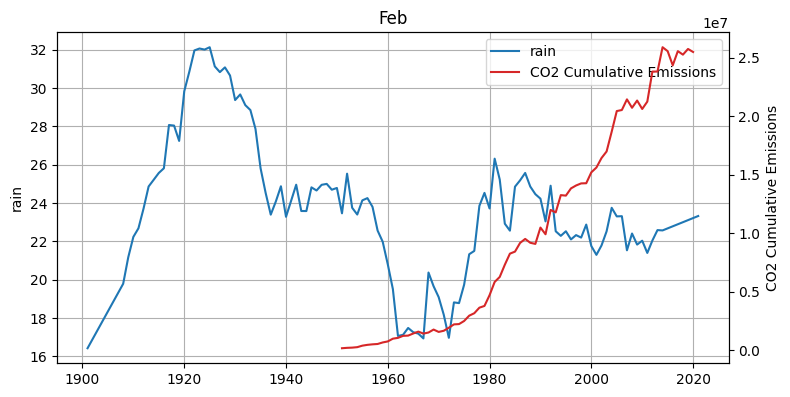

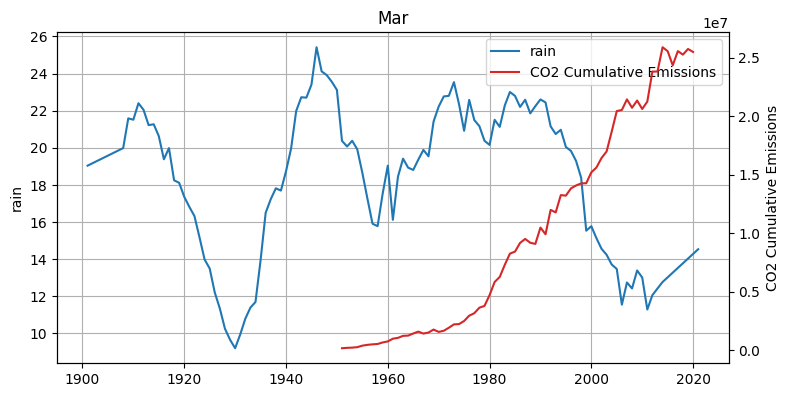

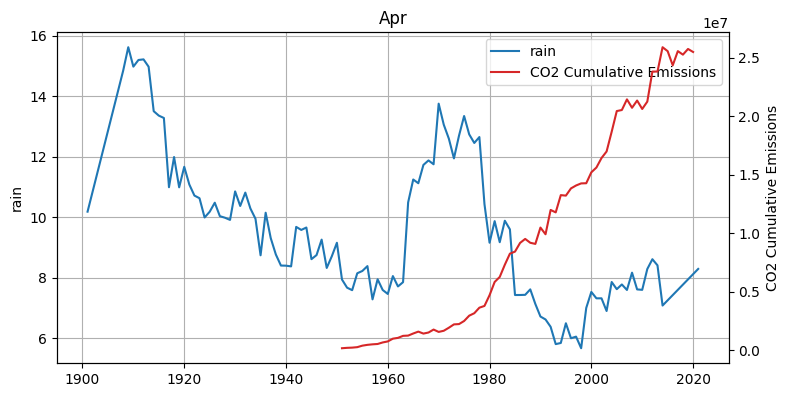

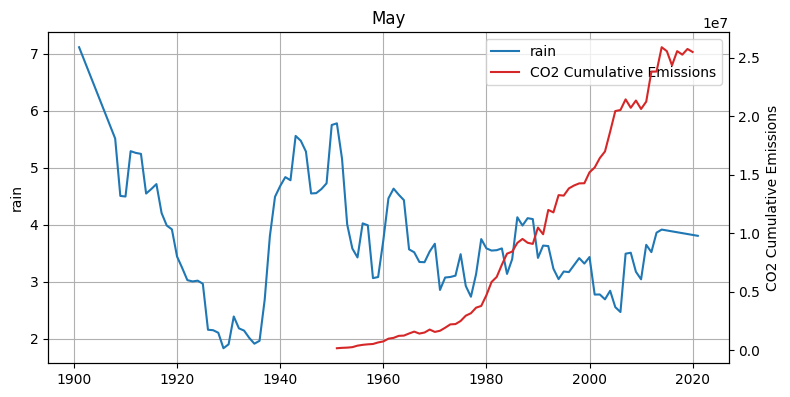

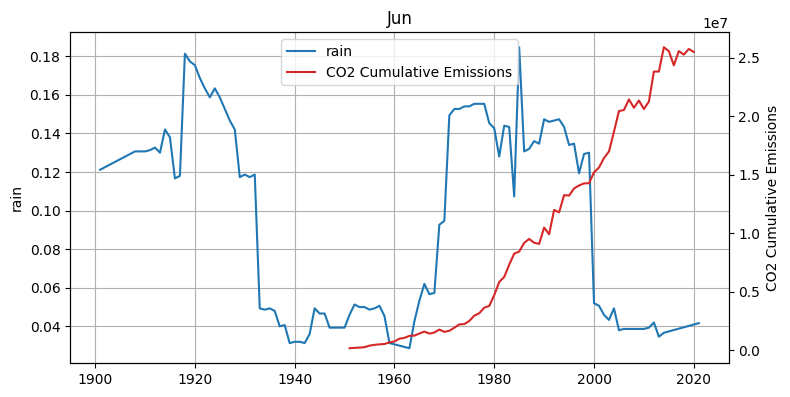

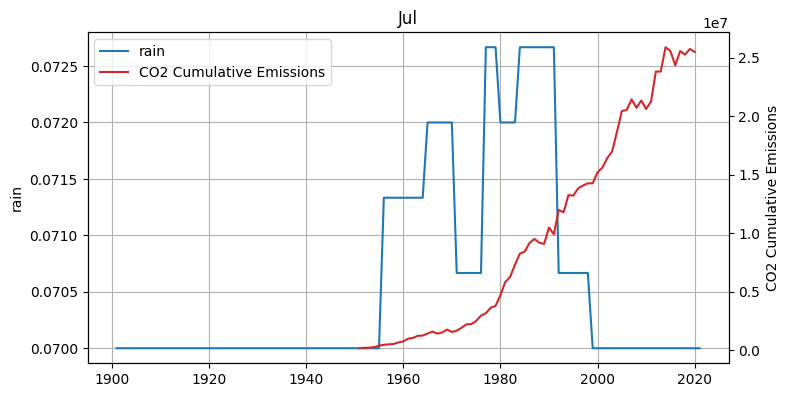

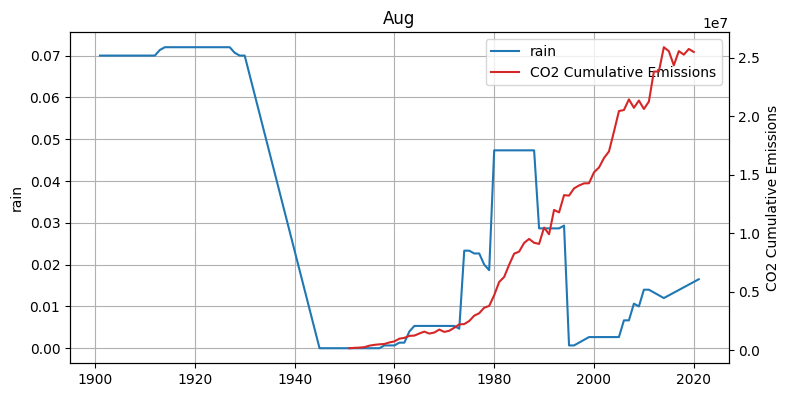

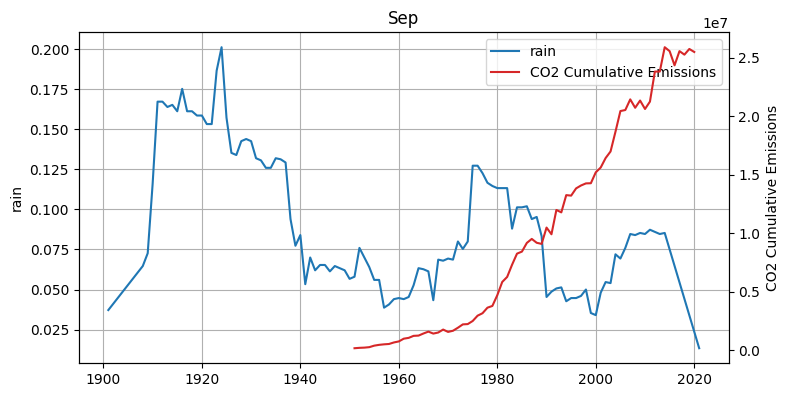

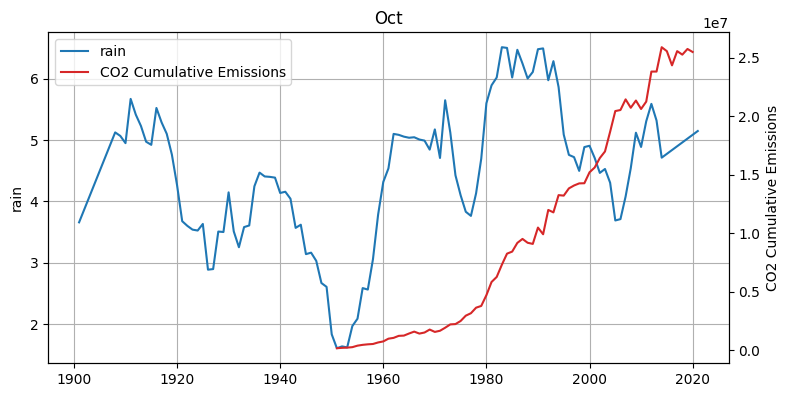

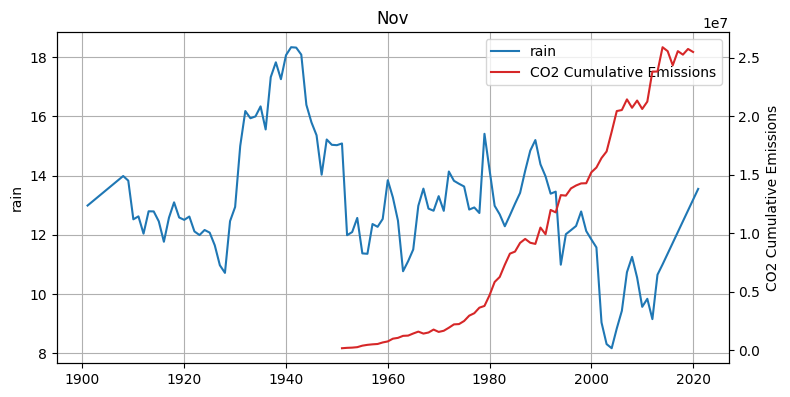

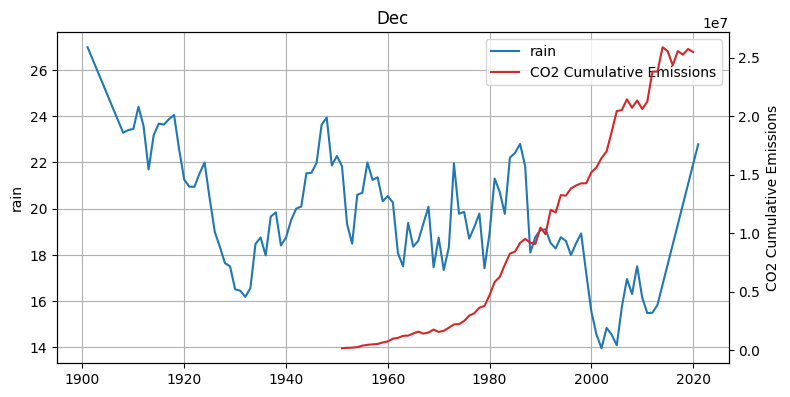

In [295]:
for wanted_month in monthss:    
    fig, ax1 = plt.subplots()
    fig.set_figwidth(8)
    fig.set_figheight(4)

    plot1=ax1.plot(rain_df['Year'],rain_df[wanted_month], color='tab:blue',label='rain')
    ax1.set_ylabel('rain')  
    plt.grid()

    ax2 = ax1.twinx()
    ax2.set_ylabel('CO2 Cumulative Emissions')  
    plot2=ax2.plot(co2_df['Year'],co2_df['co2_diff'], color='tab:red',label='CO2 Cumulative Emissions')

    fig.tight_layout()
    plt.title(wanted_month)
    lns = plot1+plot2
    labs = [l.get_label() for l in lns]
    
    ax1.legend(lns, labs, loc=0)

    plt.show()

## Monthly Climatology of Temperature & rain for all years

In [296]:
mean_monthly_temp=df.drop('Year',axis=1).mean()
mean_monthly_rain=rain_df.drop('Year',axis=1).mean()


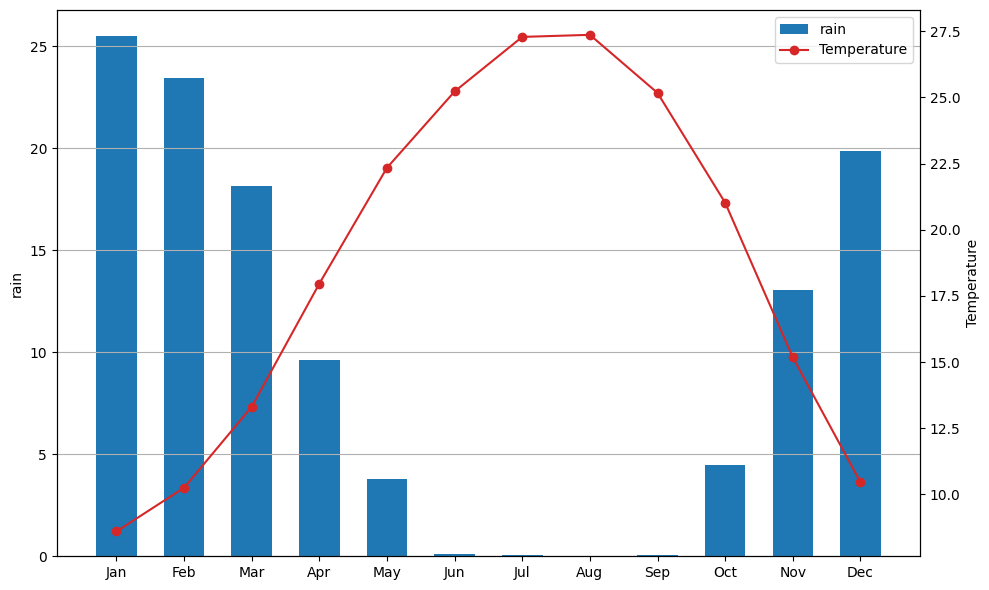

In [304]:
fig, ax1 = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(6)

plot1=ax1.bar(mean_monthly_rain.index,mean_monthly_rain, color='tab:blue',label="rain",width=0.6)
ax1.set_ylabel('rain')  

plt.grid(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel('Temperature')  
plot2=ax2.plot(mean_monthly_temp.index,mean_monthly_temp, color='tab:red',label='Temperature',marker='o')



lns = [plot1]+plot2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)
fig.tight_layout()
plt.show()

## Monthly Climatology of Temperature & rain for diffrent time period


In [298]:
test=pd.DataFrame()
for month in monthss:
    fortest=take_range(df,month,20)
    test['Year']=fortest['year']
    test[month]=fortest['temp']

test2=pd.DataFrame()
for month in monthss:
    fortest=take_range(rain_df,month,20)
    test2['Year']=fortest['year']
    test2[month]=fortest['temp']

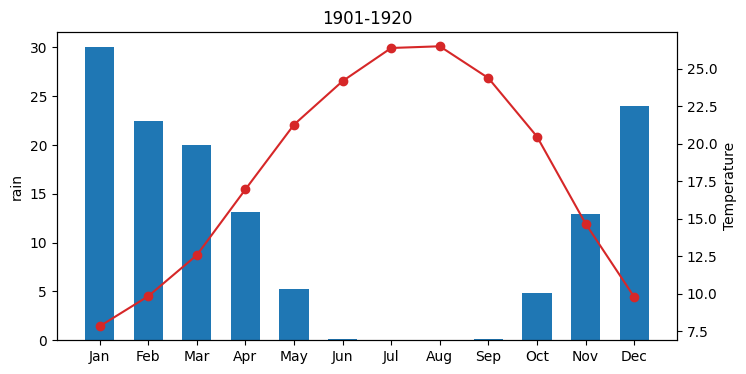

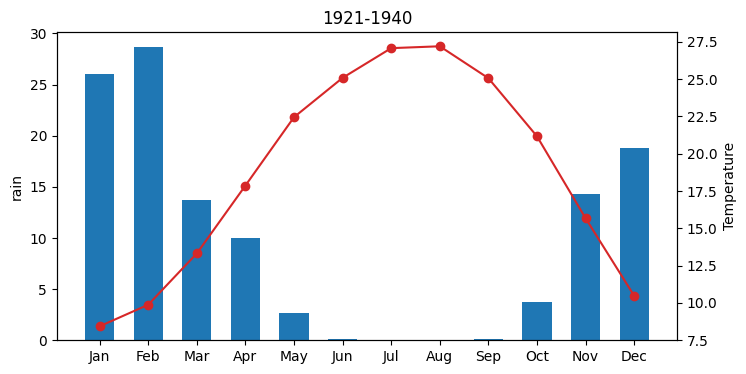

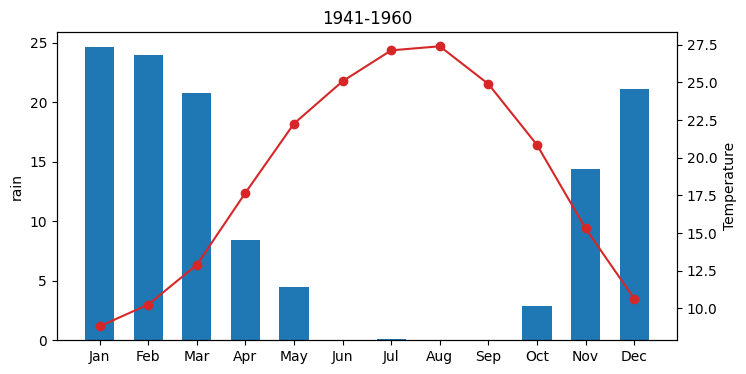

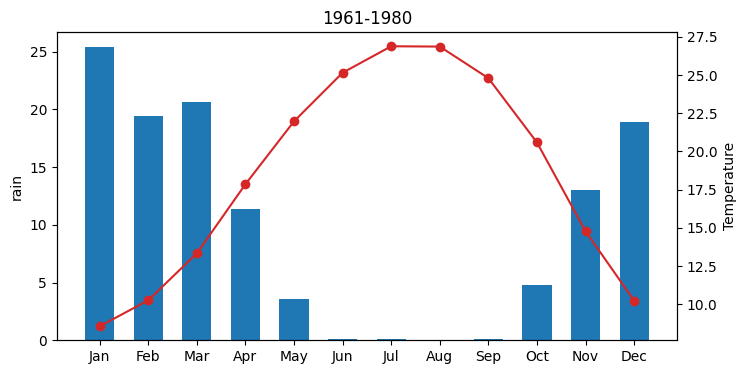

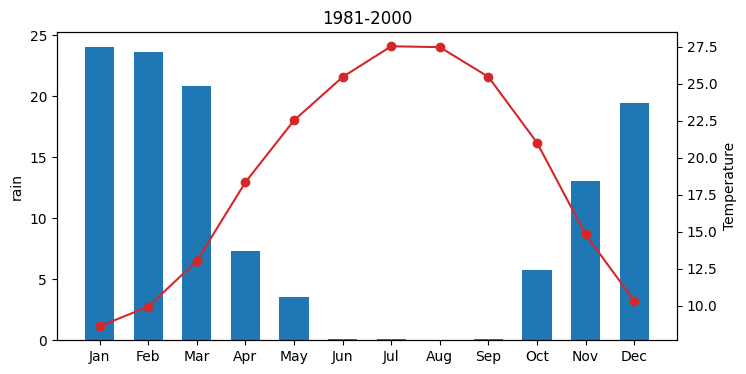

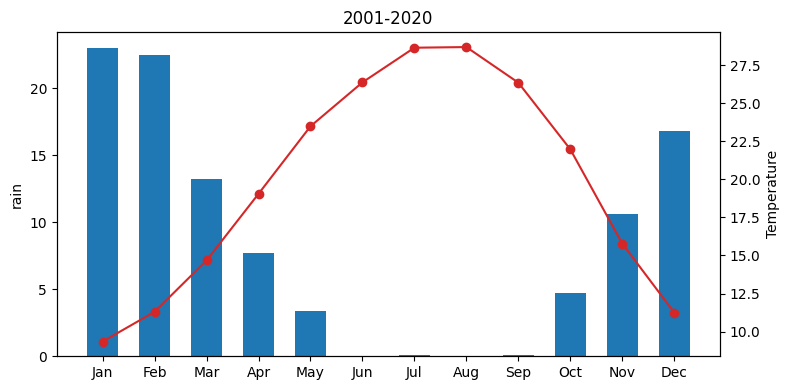

In [305]:
for i,year in zip(range(len(test)),test['Year']):
    fig, ax1 = plt.subplots()
    fig.set_figwidth(8)
    fig.set_figheight(4)
    data=test2[test2['Year']==year].drop('Year',axis=1).T
    ax1.bar(data.index,data[i], color='tab:blue',label="rain",width=0.6)
    ax1.set_title(year)
    ax1.set_ylabel('rain')  

    ax2 = ax1.twinx()
    ax2.set_ylabel('Temperature')  
    data=test[test['Year']==year].drop('Year',axis=1).T
    ax2.plot(data.index,data[i], color='tab:red',label='Temperature',marker='o')
    
plt.tight_layout()
plt.show()


## 

# model building 

In [ ]:
import prophet
